In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
data = pd.read_csv("D:\Jupyter data\Hackathon2 updated\Train.csv")

In [17]:
data.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,Y,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,Y,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,Y,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,Y,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,Y,12780.44,96408.0


In [18]:
df = data.drop(['personal_loan_active', 'personal_loan_closed', 'vehicle_loan_active', 'vehicle_loan_closed', 'loan_enq'], axis=1)

In [20]:
df.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,1674.09,20014.0
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,13043.34,10173.0
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,25375.27,16095.0
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,3544.33,7707.0
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,12780.44,96408.0


In [30]:
df['dc_avg_apr'] = df['dc_cons_apr']/ df['dc_count_apr']
df['dc_avg_may'] = df['dc_cons_may']/ df['dc_count_may']
df['dc_avg_jun'] = df['dc_cons_jun']/ df['dc_count_jun']

In [28]:
df['dc_avg'] = (df['dc_cons_apr']+df['dc_cons_may']+df['dc_cons_jun'])/(df['dc_count_apr']+df['dc_count_may']+df['dc_count_jun'])

In [29]:
df['dc_avg']

0         380.495413
1          38.872727
2         139.118941
3        2002.036667
4         113.581304
            ...     
14995     118.741016
14996    1475.960000
14997     108.150333
14998    3309.096154
14999      87.616867
Name: dc_avg, Length: 15000, dtype: float64

In [31]:
df['cc_avg_apr'] = df['cc_cons_apr']/ df['cc_count_apr']
df['cc_avg_may'] = df['cc_cons_may']/ df['cc_count_may']
df['cc_avg_jun'] = df['cc_cons_jun']/ df['cc_count_jun']

In [32]:
df['cc_avg'] = (df['cc_cons_apr']+df['cc_cons_may']+df['cc_cons_jun'])/(df['cc_count_apr']+df['cc_count_may']+df['cc_count_jun'])

In [33]:
df['cc_avg']

0        1354.536842
1        2087.172381
2         178.528927
3         582.888269
4          71.053061
            ...     
14995     579.261905
14996    1234.074615
14997     481.369858
14998    1008.905754
14999     426.117523
Name: cc_avg, Length: 15000, dtype: float64

In [35]:
df['debit_amount_avg_apr'] = df['debit_amount_apr']/df['debit_count_apr']
df['debit_amount_avg_may'] = df['debit_amount_may']/df['debit_count_may']
df['debit_amount_avg_jun'] = df['debit_amount_jun']/df['debit_count_jun']

In [36]:
df['debit_amount_avg'] = (df['debit_amount_apr']+df['debit_amount_may']+df['debit_amount_jun'])/(df['debit_count_apr']+df['debit_count_may']+df['debit_count_jun'])

In [37]:
df['debit_amount_avg']

0         988.358915
1         833.246420
2         721.995161
3         763.888110
4        1408.965000
            ...     
14995    5777.489474
14996    1314.662963
14997    1863.742195
14998    1742.142222
14999    1441.478930
Name: debit_amount_avg, Length: 15000, dtype: float64

In [38]:
df['credit_amount_avg_apr'] = df['credit_amount_apr']/df['credit_count_apr']
df['credit_amount_avg_may'] = df['credit_amount_may']/df['credit_count_may']
df['credit_amount_avg_jun'] = df['credit_amount_jun']/df['credit_count_jun']

In [39]:
df['credit_amount_avg'] = (df['credit_amount_apr']+df['credit_amount_may']+df['credit_amount_jun'])/(df['credit_count_apr']+df['credit_count_may']+df['credit_count_jun'])

In [40]:
df['credit_amount_avg']

0        22973.013000
1         4001.040169
2        12841.166667
3         4973.889730
4         2490.044559
             ...     
14995     5732.500000
14996     6400.444118
14997     8169.755625
14998     4996.065429
14999    17502.342593
Name: credit_amount_avg, Length: 15000, dtype: float64

In [41]:
df.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,cc_avg_jun,cc_avg,debit_amount_avg_apr,debit_amount_avg_may,debit_amount_avg_jun,debit_amount_avg,credit_amount_avg_apr,credit_amount_avg_may,credit_amount_avg_jun,credit_amount_avg
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,1629.140000,1354.536842,3579.978333,288.187500,462.328000,988.358915,4198.666667,95888.565000,6380.500000,22973.013000
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,324.384615,2087.172381,350.164286,1183.032949,668.556349,833.246420,2463.704722,35581.000000,3628.857143,4001.040169
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,234.865196,178.528927,474.902778,235.890244,58373.250000,721.995161,9431.111111,35489.000000,10754.714286,12841.166667
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,350.420000,582.888269,268.796047,1154.418684,841.584458,763.888110,7877.533333,2740.601739,3271.809524,4973.889730
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,25.865854,71.053061,370.061087,3065.074200,314.718750,1408.965000,1636.028611,1261.916667,10017.500000,2490.044559


In [44]:
cat_cols = df.select_dtypes(exclude='object')

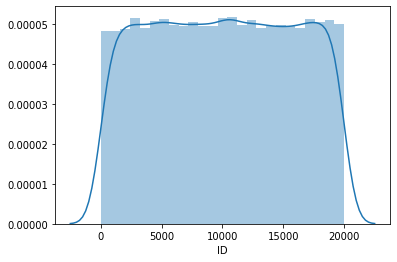

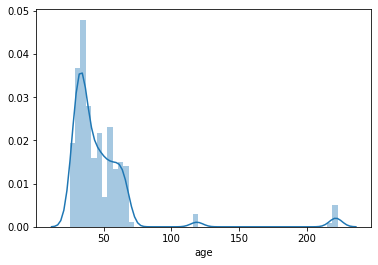

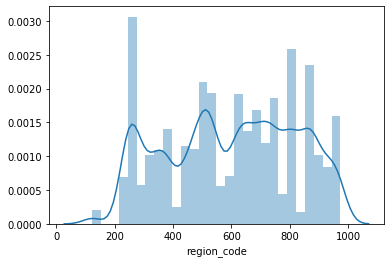

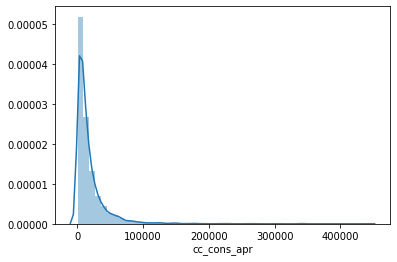

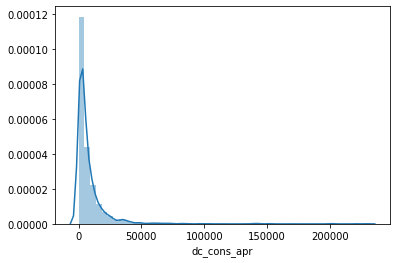

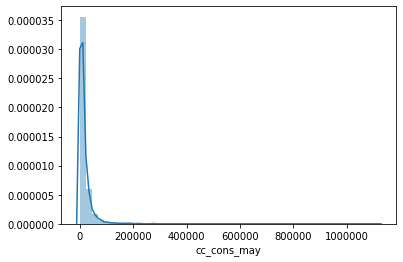

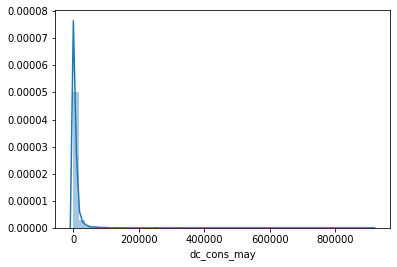

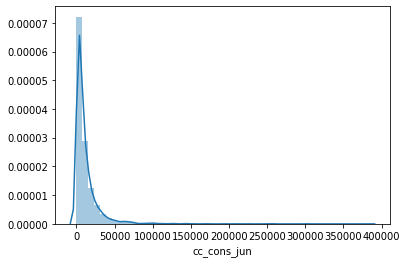

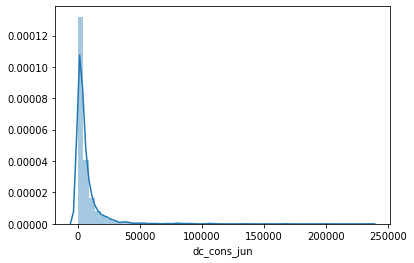

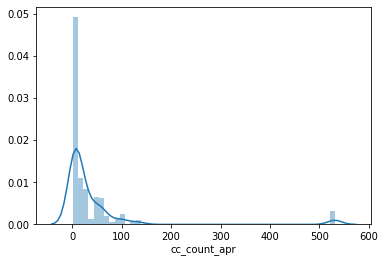

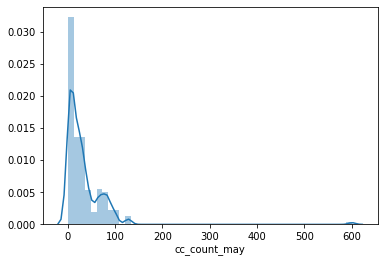

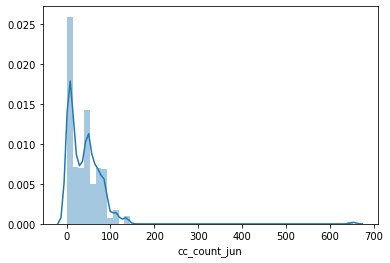

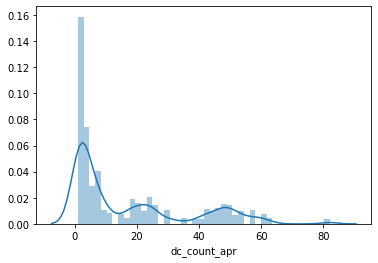

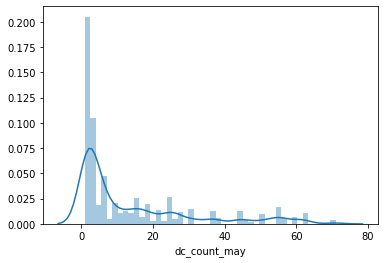

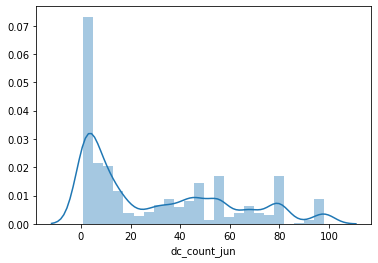

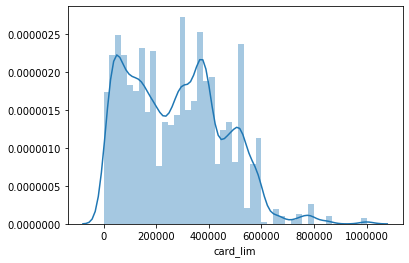

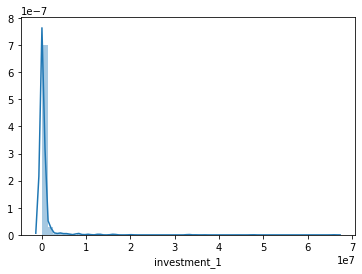

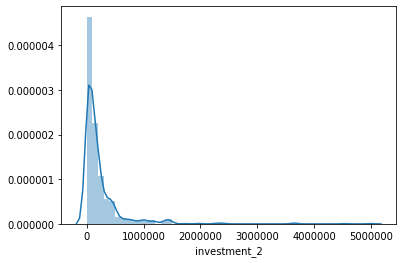

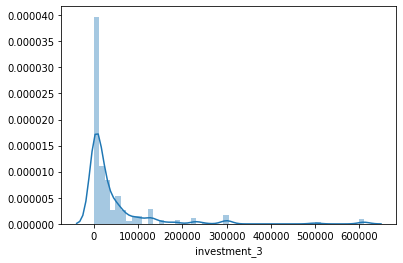

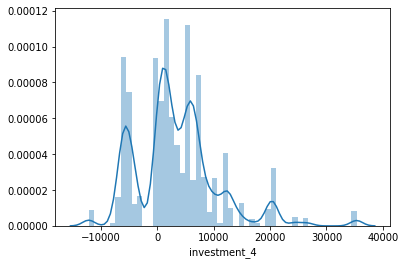

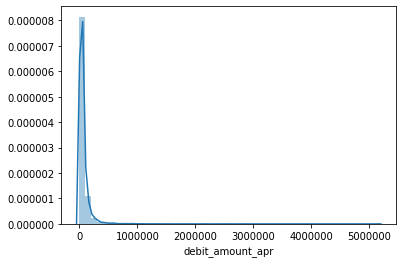

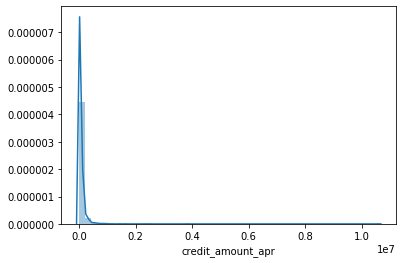

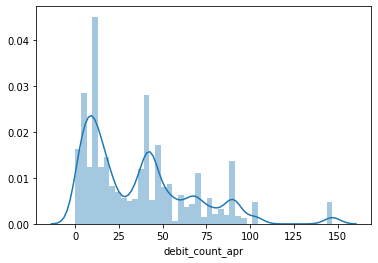

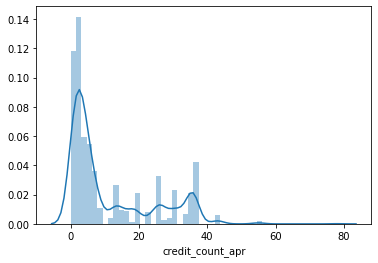

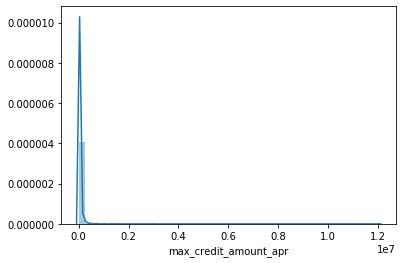

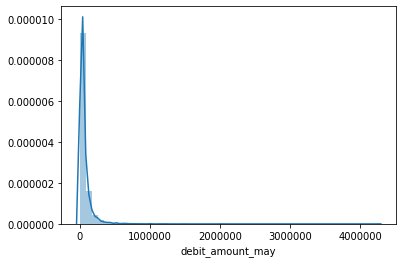

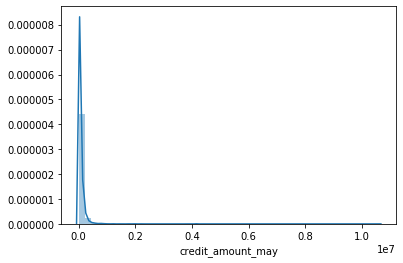

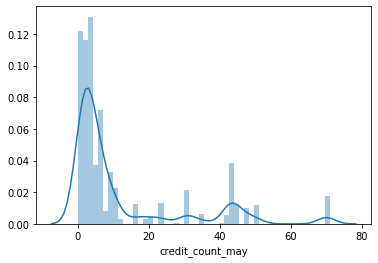

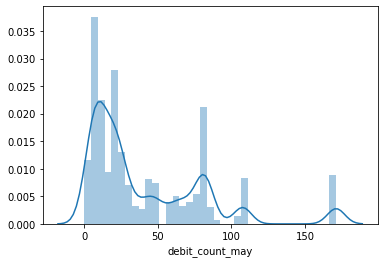

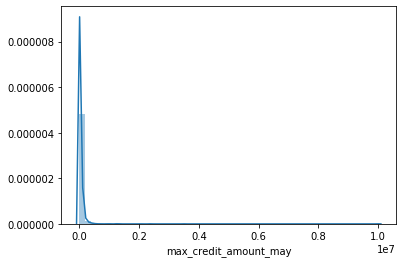

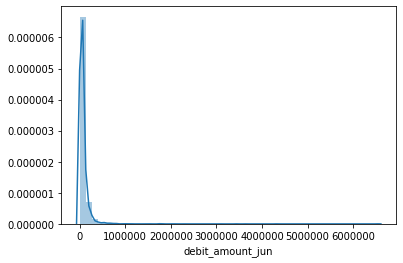

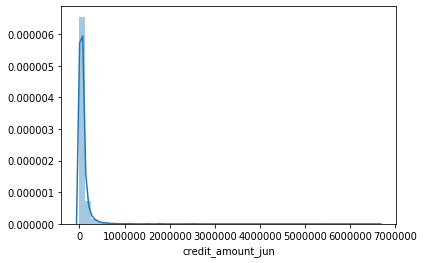

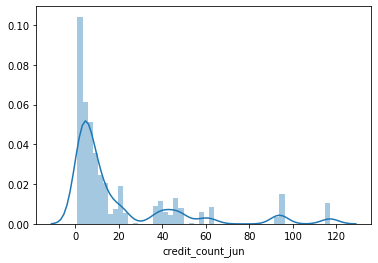

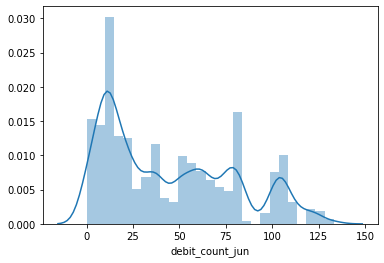

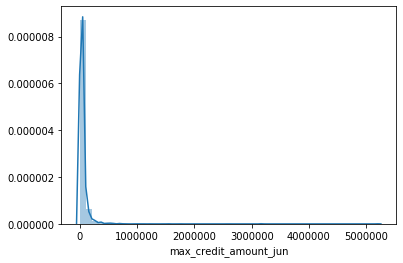

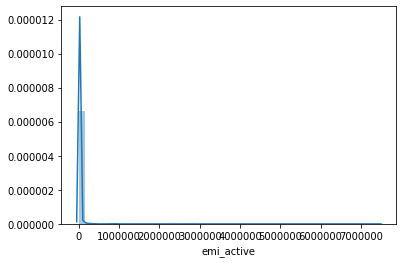

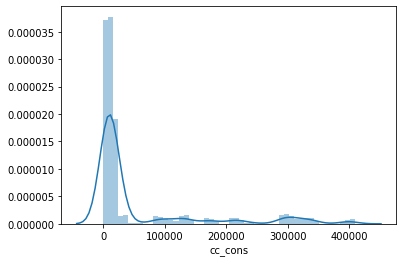

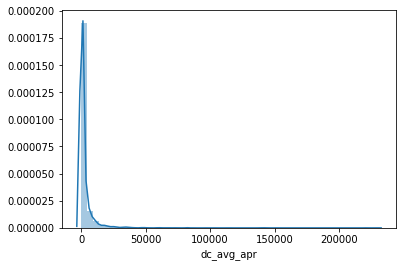

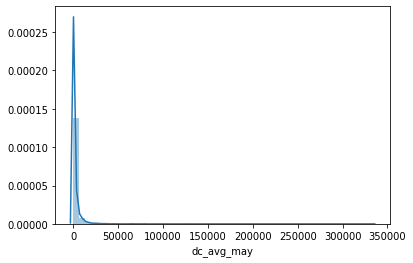

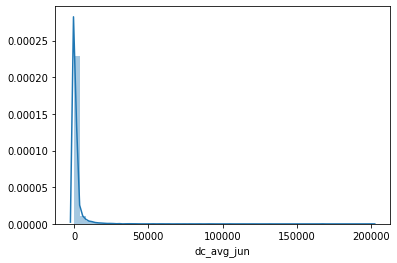

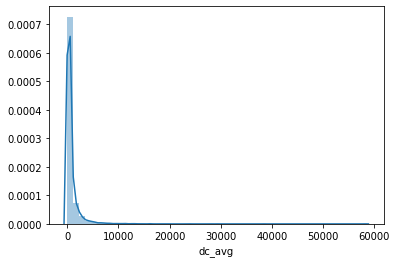

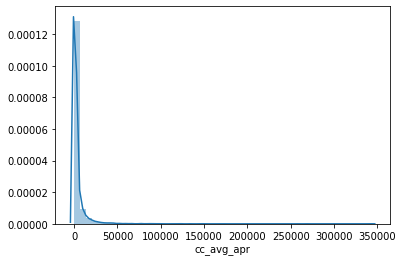

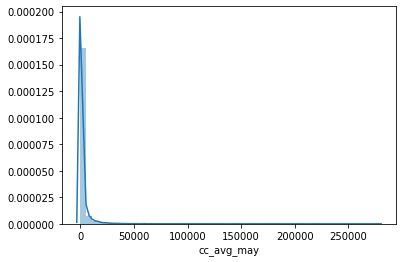

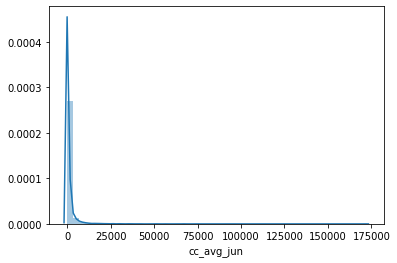

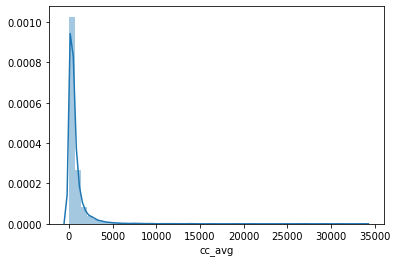

OverflowError: cannot convert float infinity to integer

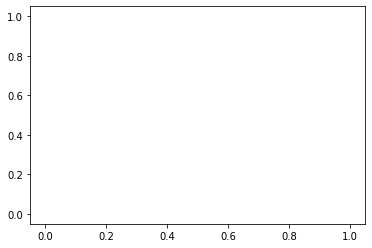

In [61]:
for cols in cat_cols:
    sns.distplot(df[cols])
    plt.show()

In [67]:
def float_to_int(cols):
    if x == float('inf'):
        return float('NaN')
    return int(x)
df[float_to_int(df[cat_cols])]

ValueError: Must pass DataFrame with boolean values only

In [62]:
df[df=='inf'].count()

ID                       0
account_type             0
gender                   0
age                      0
region_code              0
cc_cons_apr              0
dc_cons_apr              0
cc_cons_may              0
dc_cons_may              0
cc_cons_jun              0
dc_cons_jun              0
cc_count_apr             0
cc_count_may             0
cc_count_jun             0
dc_count_apr             0
dc_count_may             0
dc_count_jun             0
card_lim                 0
investment_1             0
investment_2             0
investment_3             0
investment_4             0
debit_amount_apr         0
credit_amount_apr        0
debit_count_apr          0
credit_count_apr         0
max_credit_amount_apr    0
debit_amount_may         0
credit_amount_may        0
credit_count_may         0
debit_count_may          0
max_credit_amount_may    0
debit_amount_jun         0
credit_amount_jun        0
credit_count_jun         0
debit_count_jun          0
max_credit_amount_jun    0
e

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 55 columns):
ID                       15000 non-null int64
account_type             15000 non-null object
gender                   15000 non-null object
age                      15000 non-null int64
region_code              15000 non-null int64
cc_cons_apr              15000 non-null float64
dc_cons_apr              15000 non-null float64
cc_cons_may              15000 non-null float64
dc_cons_may              15000 non-null float64
cc_cons_jun              15000 non-null float64
dc_cons_jun              15000 non-null float64
cc_count_apr             15000 non-null float64
cc_count_may             15000 non-null float64
cc_count_jun             15000 non-null float64
dc_count_apr             15000 non-null float64
dc_count_may             15000 non-null float64
dc_count_jun             15000 non-null float64
card_lim                 15000 non-null float64
investment_1             15000 non-

In [90]:
data_1= df

In [92]:
data_1.replace([np.inf],np.nan)

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,cc_avg_jun,cc_avg,debit_amount_avg_apr,debit_amount_avg_may,debit_amount_avg_jun,debit_amount_avg,credit_amount_avg_apr,credit_amount_avg_may,credit_amount_avg_jun,credit_amount_avg
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,...,1629.140000,1354.536842,3579.978333,288.187500,462.328000,988.358915,4198.666667,95888.565000,6380.500000,22973.013000
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,...,324.384615,2087.172381,350.164286,1183.032949,668.556349,833.246420,2463.704722,35581.000000,3628.857143,4001.040169
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,...,234.865196,178.528927,474.902778,235.890244,58373.250000,721.995161,9431.111111,35489.000000,10754.714286,12841.166667
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,...,350.420000,582.888269,268.796047,1154.418684,841.584458,763.888110,7877.533333,2740.601739,3271.809524,4973.889730
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,...,25.865854,71.053061,370.061087,3065.074200,314.718750,1408.965000,1636.028611,1261.916667,10017.500000,2490.044559
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,6995,current,F,53,653,10443.76,1218.85,7252.24,3873.00,6633.00,...,2211.000000,579.261905,387.449873,3812.721250,60968.898750,5777.489474,15567.500000,23692.000000,3044.678571,5732.500000
14996,10376,current,M,44,535,29890.33,6308.00,16025.50,7610.00,2213.08,...,553.270000,1234.074615,927.976744,2895.934500,481.445000,1314.662963,11898.500000,12505.750000,3180.686364,6400.444118
14997,2181,current,M,37,464,4148.98,948.74,19360.26,494.00,44363.91,...,727.277213,481.369858,7381.407500,5080.950000,1341.047671,1863.742195,95477.270000,819.511628,65358.000000,8169.755625
14998,18417,current,M,220,536,115574.00,7191.05,44341.13,34817.20,20679.00,...,469.977273,1008.905754,39790.180000,1843.476000,283.674000,1742.142222,2056.689655,27397.666667,11008.430000,4996.065429


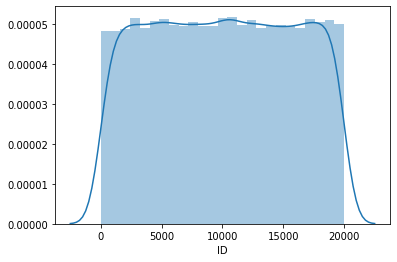

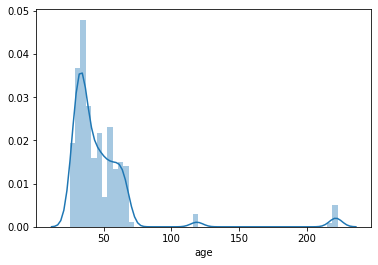

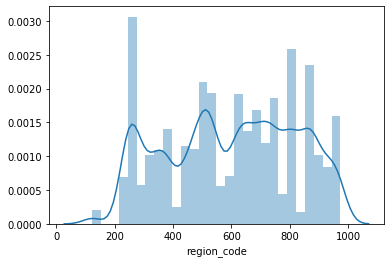

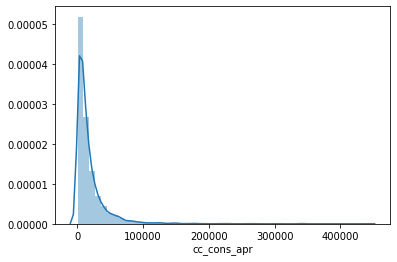

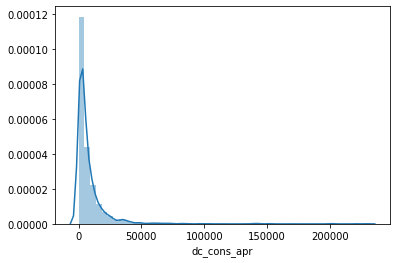

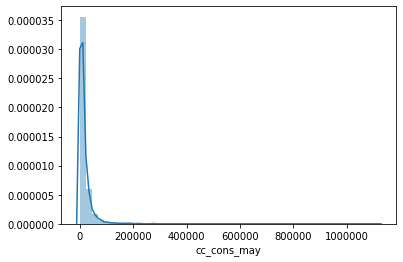

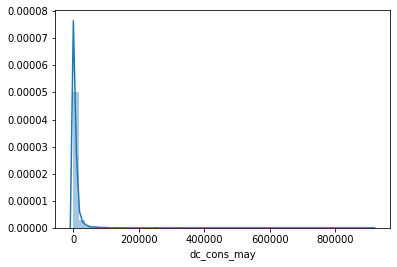

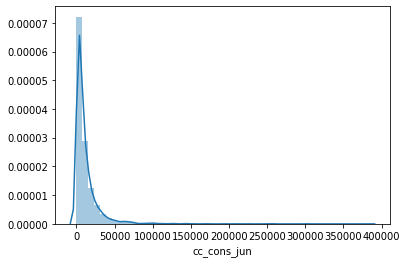

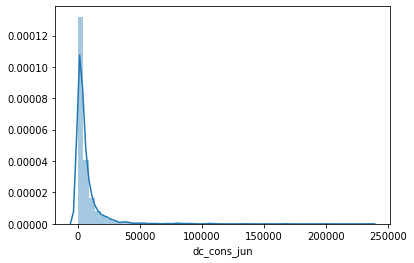

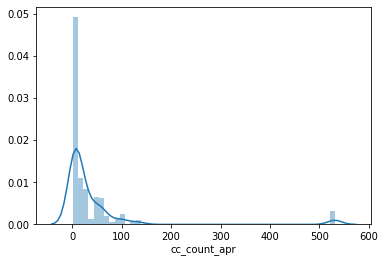

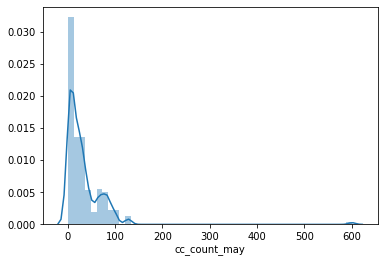

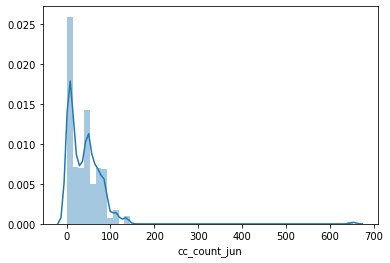

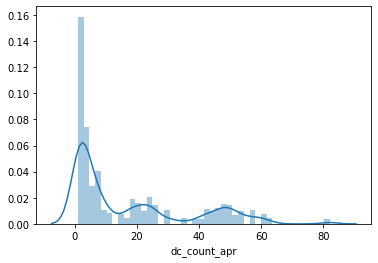

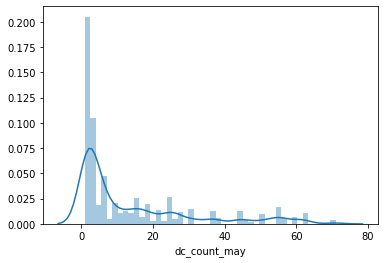

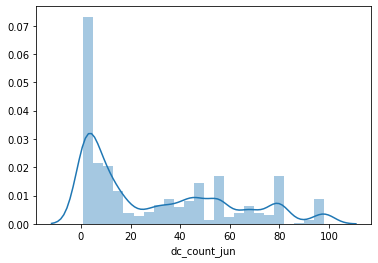

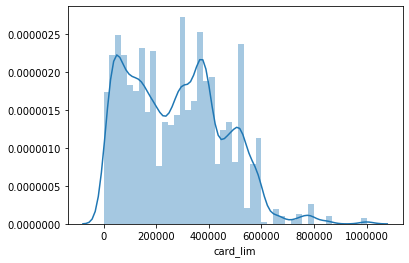

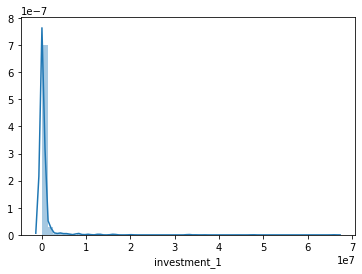

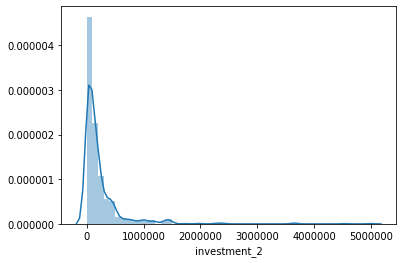

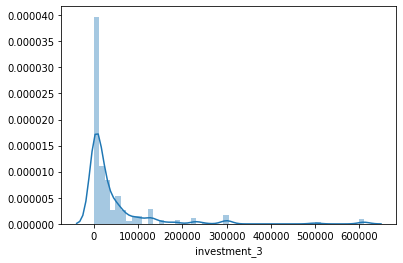

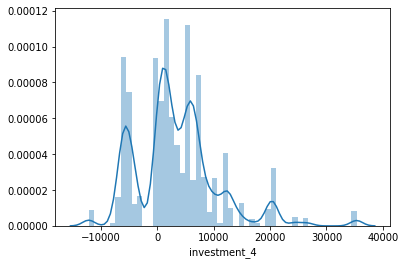

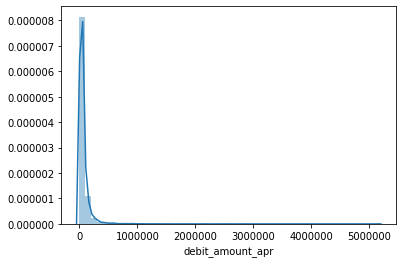

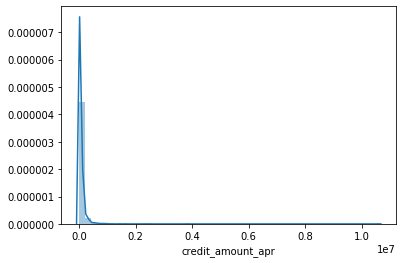

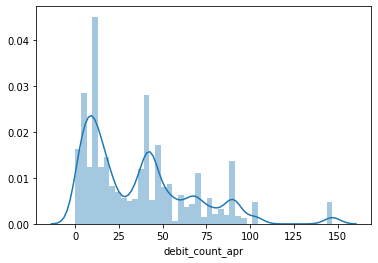

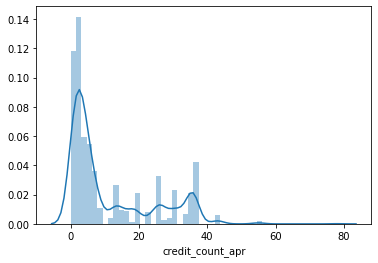

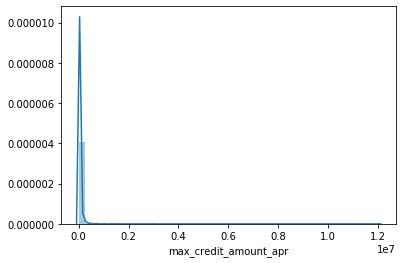

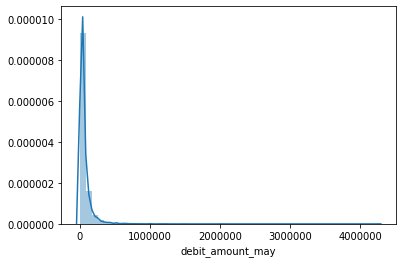

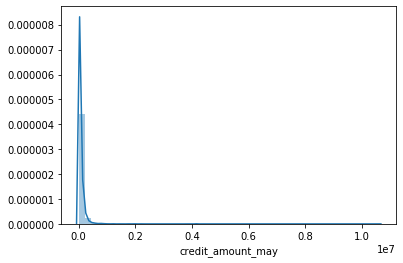

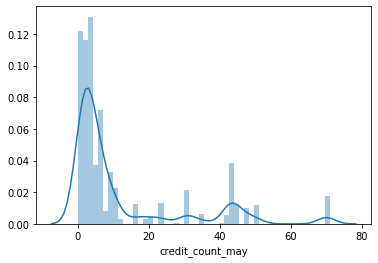

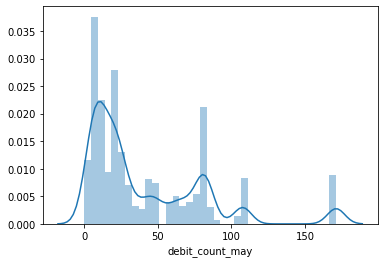

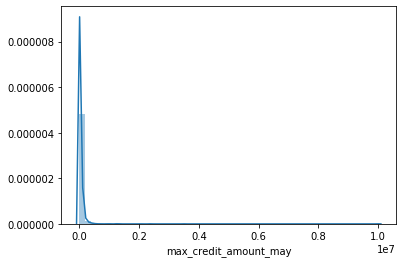

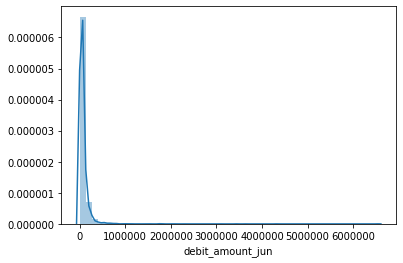

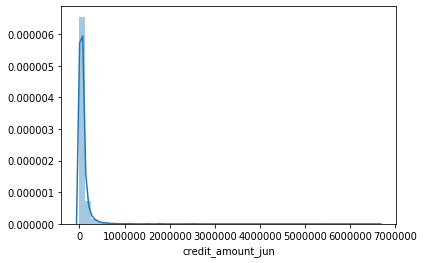

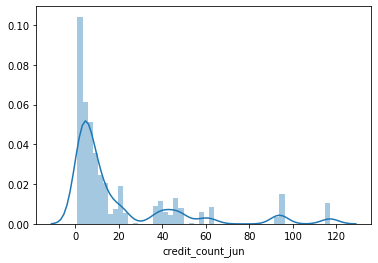

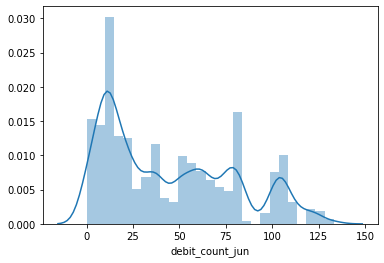

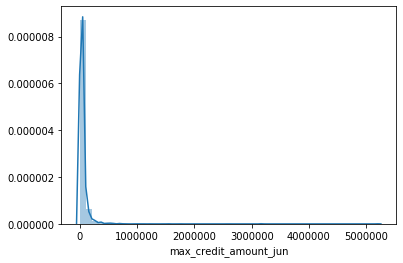

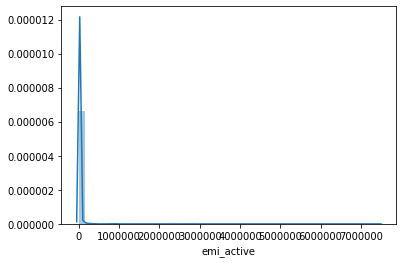

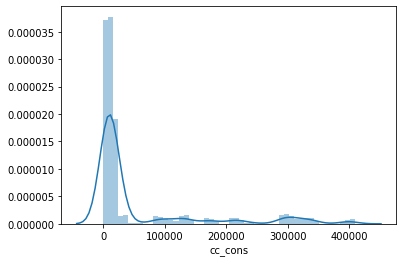

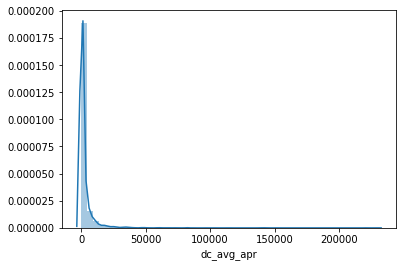

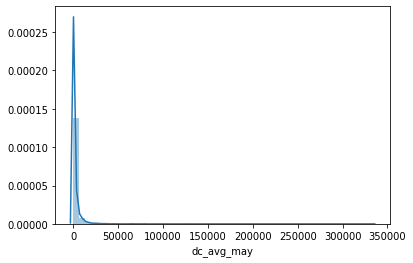

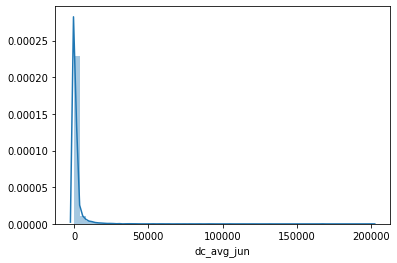

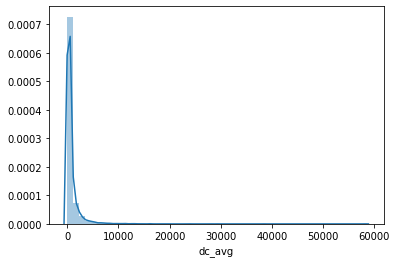

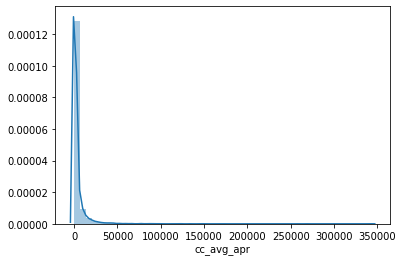

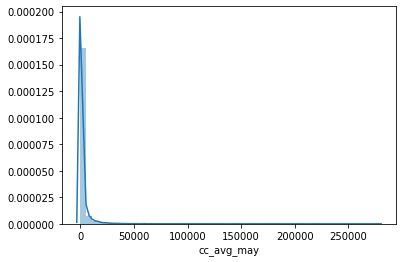

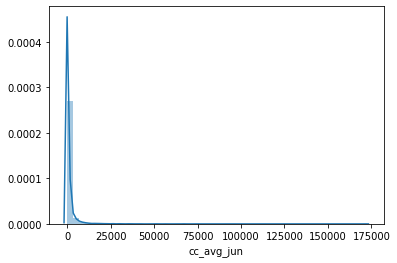

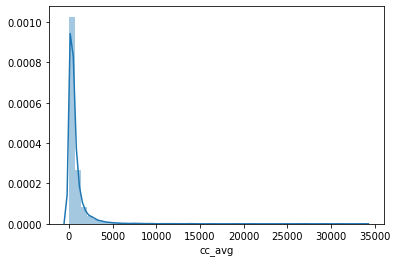

OverflowError: cannot convert float infinity to integer

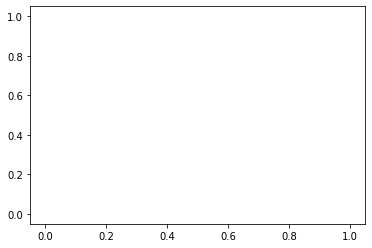

In [93]:
for cols in cat_cols:
    sns.distplot(data_1[cols])
    plt.show()

In [94]:
data_1.describe()

,ID,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,cc_avg_jun,cc_avg,debit_amount_avg_apr,debit_amount_avg_may,debit_amount_avg_jun,debit_amount_avg,credit_amount_avg_apr,credit_amount_avg_may,credit_amount_avg_jun,credit_amount_avg
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,...,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000
mean,10032.077067,47.790600,598.415467,17957.391719,8171.098287,1.633705e+04,7703.605203,12129.010832,7097.395321,41.488333,...,1200.784546,761.613694,inf,inf,inf,2489.124502,inf,inf,1.472678e+04,11384.582459
std,5760.372343,30.632766,220.062345,25187.939958,14773.029481,2.706085e+04,18987.296785,18488.781136,13251.695907,97.432251,...,4098.770401,1285.616851,NaN,NaN,NaN,4006.816737,NaN,NaN,3.724486e+04,20519.101613
min,1.000000,25.000000,123.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,...,1.067381,7.829234,8.673077e-02,6.504938e-01,9.175439e-02,43.749171,3.912667e+00,3.571429e-01,4.957265e-01,9.573171
25%,5060.500000,33.000000,424.000000,4411.027500,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.750000,5.000000,...,83.979865,211.144362,6.176449e+02,5.574601e+02,5.550695e+02,864.026705,2.447188e+03,2.859194e+03,1.519071e+03,2771.188574
50%,10054.000000,40.000000,623.000000,10288.100000,3996.900000,8.695030e+03,3820.500000,6655.250000,3327.000000,10.000000,...,243.758606,408.525548,1.621039e+03,1.544709e+03,1.438694e+03,1474.676840,8.956673e+03,1.086750e+04,5.333237e+03,5784.430312
75%,15015.250000,53.000000,799.000000,21405.000000,9339.020000,1.895130e+04,8212.000000,14247.000000,7597.000000,44.000000,...,802.039379,816.399308,4.706268e+03,4.391266e+03,4.114170e+03,2739.990529,2.910240e+04,3.252744e+04,1.474880e+04,12894.157999
max,19998.000000,223.000000,974.000000,441031.330000,229255.000000,1.117246e+06,911223.490000,382914.100000,233384.000000,531.000000,...,171480.330000,33694.346667,inf,inf,inf,147594.307391,inf,inf,1.253086e+06,980192.818182


In [107]:
pd.set_option('display.max_columns', 60)

In [109]:
df.describe()

,ID,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,dc_avg_apr,dc_avg_may,dc_avg_jun,dc_avg,cc_avg_apr,cc_avg_may,cc_avg_jun,cc_avg,debit_amount_avg_apr,debit_amount_avg_may,debit_amount_avg_jun,debit_amount_avg,credit_amount_avg_apr,credit_amount_avg_may,credit_amount_avg_jun,credit_amount_avg
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000
mean,10032.077067,47.790600,598.415467,17957.391719,8171.098287,1.633705e+04,7703.605203,12129.010832,7097.395321,41.488333,33.490200,41.507000,17.171000,13.979733,30.287267,277005.147400,6.194140e+05,2.333642e+05,44440.348527,3523.049025,6.823421e+04,8.079761e+04,36.400267,11.291400,5.438954e+04,6.554492e+04,8.356935e+04,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576040e+04,55157.729867,2575.575061,2390.926567,1498.170766,753.132211,3427.068871,2202.615486,1200.784546,761.613694,inf,inf,inf,2489.124502,inf,inf,1.472678e+04,11384.582459
std,5760.372343,30.632766,220.062345,25187.939958,14773.029481,2.706085e+04,18987.296785,18488.781136,13251.695907,97.432251,49.540999,47.342918,19.359678,17.087203,29.252490,179429.540139,3.087815e+06,4.073237e+05,88113.186017,7373.355434,1.126786e+05,1.989060e+05,30.700996,12.670785,1.950943e+05,1.016829e+05,1.776300e+05,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179153e+05,97670.972252,7636.977732,6728.319432,5630.982157,1514.790243,9712.575347,7682.983567,4098.770401,1285.616851,NaN,NaN,NaN,4006.816737,NaN,NaN,3.724486e+04,20519.101613
min,1.000000,25.000000,123.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000e-01,3.000000e+00,462.000000,-12179.000000,4.010000e+00,6.138000e+01,0.000000,0.000000,1.000000e+00,2.820000e+01,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000,0.773585,0.690909,0.632653,5.625850,0.693032,1.128652,1.067381,7.829234,8.673077e-02,6.504938e-01,9.175439e-02,43.749171,3.912667e+00,3.571429e-01,4.957265e-01,9.573171
25%,5060.500000,33.000000,424.000000,4411.027500,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.750000,5.000000,8.000000,10.000000,2.000000,2.000000,4.000000,124000.000000,6.100000e+03,3.817300e+04,2214.000000,0.000000,2.323043e+04,2.684600e+04,11.000000,2.000000,2.068300e+04,2.100333e+04,2.541027e+04,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.548510e+03,6768.000000,127.610852,159.411438,57.230357,154.241601,212.246156,146.078804,83.979865,211.144362,6.176449e+02,5.574601e+02,5.550695e+02,864.026705,2.447188e+03,2.859194e+03,1.519071e+03,2771.188574
50%,10054.000000,40.000000,623.000000,10288.100000,3996.900000,8.695030e+03,3820.500000,6655.250000,3327.000000,10.000000,23.000000,35.000000,7.000000,5.000000,17.0

In [178]:
data_2 = df.drop(['debit_amount_avg_apr', 'debit_amount_avg_may','debit_amount_avg_jun','credit_amount_avg_apr', 'credit_amount_avg_may', 'credit_amount_avg_jun'], axis=1)

In [179]:
data_2.describe()

,ID,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,dc_avg_apr,dc_avg_may,dc_avg_jun,dc_avg,cc_avg_apr,cc_avg_may,cc_avg_jun,cc_avg,debit_amount_avg,credit_amount_avg
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,1.500000e+04,15000.000000,15000.000000,1.500000e+04,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,10032.077067,47.790600,598.415467,17957.391719,8171.098287,1.633705e+04,7703.605203,12129.010832,7097.395321,41.488333,33.490200,41.507000,17.171000,13.979733,30.287267,277005.147400,6.194140e+05,2.333642e+05,44440.348527,3523.049025,6.823421e+04,8.079761e+04,36.400267,11.291400,5.438954e+04,6.554492e+04,8.356935e+04,11.923133,40.996867,5.718791e+04,7.615987e+04,7.850316e+04,19.946400,44.647867,5.258654e+04,1.576040e+04,55157.729867,2575.575061,2390.926567,1498.170766,753.132211,3427.068871,2202.615486,1200.784546,761.613694,2489.124502,11384.582459
std,5760.372343,30.632766,220.062345,25187.939958,14773.029481,2.706085e+04,18987.296785,18488.781136,13251.695907,97.432251,49.540999,47.342918,19.359678,17.087203,29.252490,179429.540139,3.087815e+06,4.073237e+05,88113.186017,7373.355434,1.126786e+05,1.989060e+05,30.700996,12.670785,1.950943e+05,1.016829e+05,1.776300e+05,16.843563,40.537354,2.000194e+05,1.545112e+05,1.482005e+05,27.200165,35.089082,1.282601e+05,1.179153e+05,97670.972252,7636.977732,6728.319432,5630.982157,1514.790243,9712.575347,7682.983567,4098.770401,1285.616851,4006.816737,20519.101613
min,1.000000,25.000000,123.000000,253.000000,19.350000,1.570000e+02,22.000000,65.000000,62.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000e-01,3.000000e+00,462.000000,-12179.000000,4.010000e+00,6.138000e+01,0.000000,0.000000,1.000000e+00,2.820000e+01,1.061000e+01,0.000000,0.000000,2.500000e-01,5.230000e+00,1.188000e+01,1.000000,0.000000,6.000000e-02,0.000000e+00,0.000000,0.773585,0.690909,0.632653,5.625850,0.693032,1.128652,1.067381,7.829234,43.749171,9.573171
25%,5060.500000,33.000000,424.000000,4411.027500,1634.000000,3.638000e+03,1643.500000,3004.500000,1358.750000,5.000000,8.000000,10.000000,2.000000,2.000000,4.000000,124000.000000,6.100000e+03,3.817300e+04,2214.000000,0.000000,2.323043e+04,2.684600e+04,11.000000,2.000000,2.068300e+04,2.100333e+04,2.541027e+04,2.000000,11.000000,2.008300e+04,2.573259e+04,2.492008e+04,4.000000,12.000000,1.903800e+04,1.548510e+03,6768.000000,127.610852,159.411438,57.230357,154.241601,212.246156,146.078804,83.979865,211.144362,864.026705,2771.188574
50%,10054.000000,40.000000,623.000000,10288.100000,3996.900000,8.695030e+03,3820.500000,6655.250000,3327.000000,10.000000,23.000000,35.000000,7.000000,5.000000,17.000000,272000.000000,4.503600e+04,1.110000e+05,13873.000000,2351.000000,4.187560e+04,4.709700e+04,32.000000,5.000000,3.191500e+04,3.823568e+04,4.814000e+04,4.000000,23.000000,3.140300e+04,4.580365e+04,4.590000e+04,7.000000,38.000000,3.042550e+04,3.954430e+03,13364.000000,507.262500,597.214286,206.387587,315.742508,824.846430,444.365109,243.758606,408.525548,1474.676840,5784.430312
75%,15015.250000,53.000000,799.000000,21405.00

In [180]:
cat_cols=data_2.select_dtypes(exclude='object')

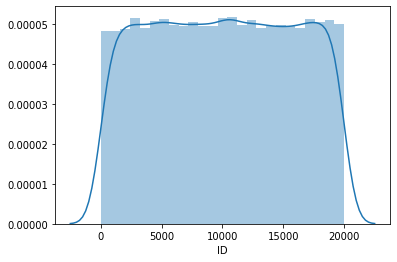

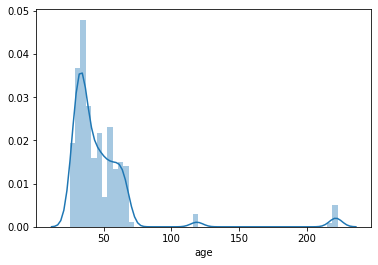

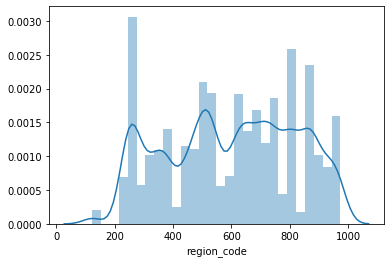

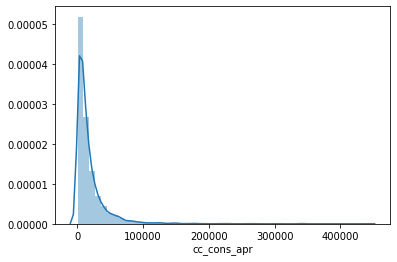

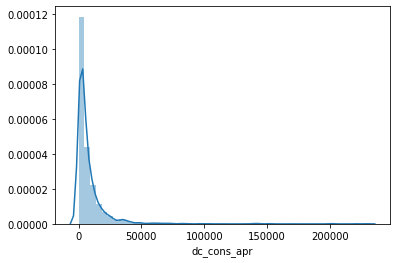

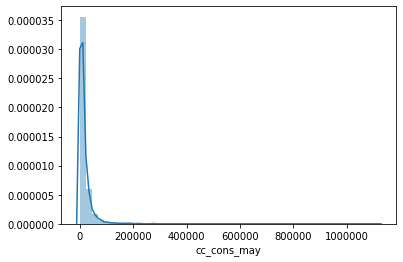

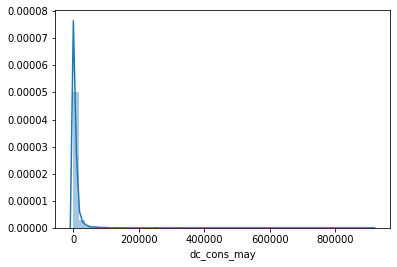

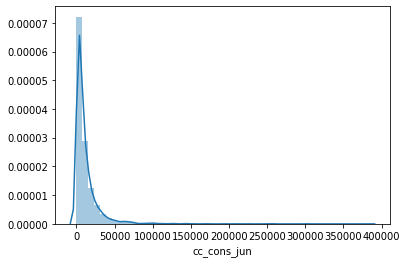

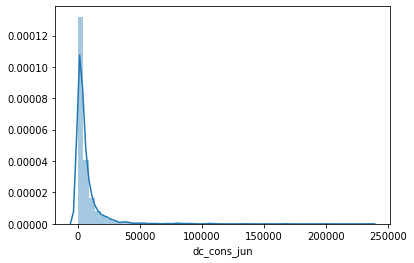

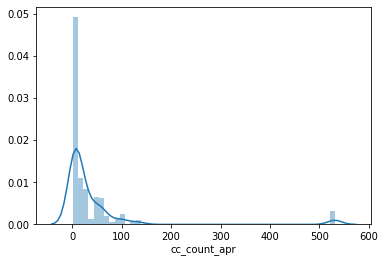

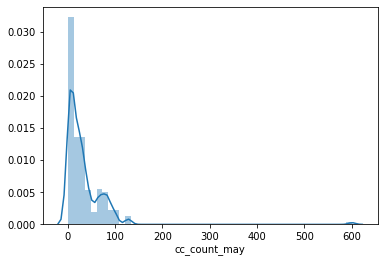

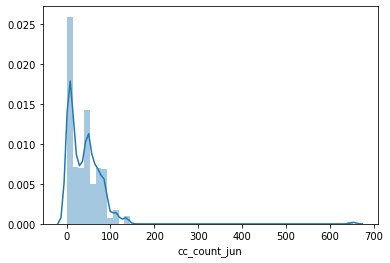

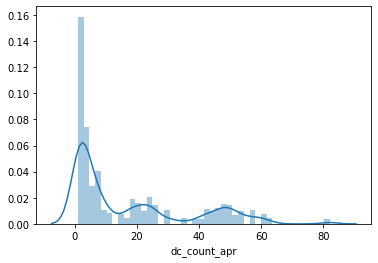

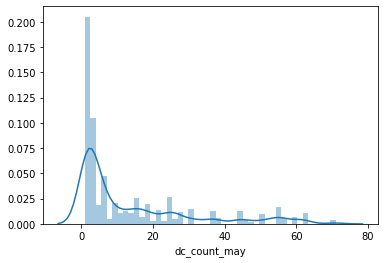

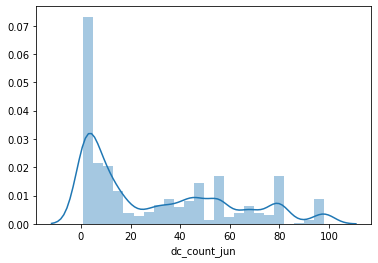

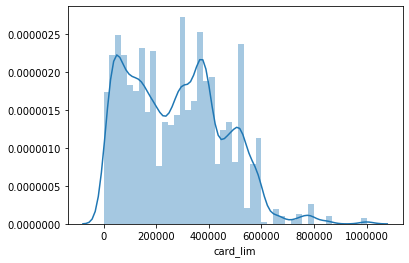

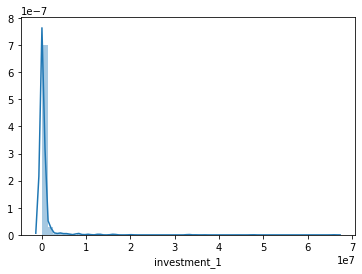

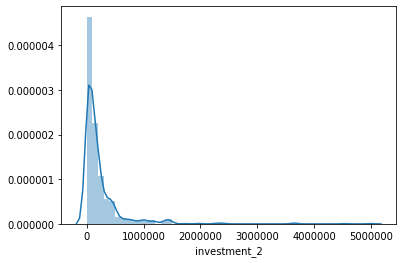

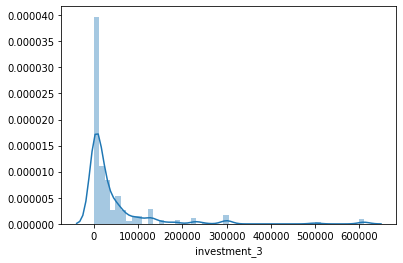

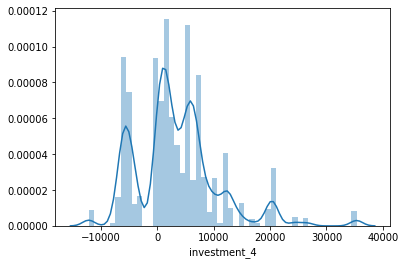

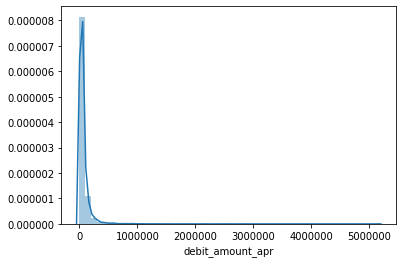

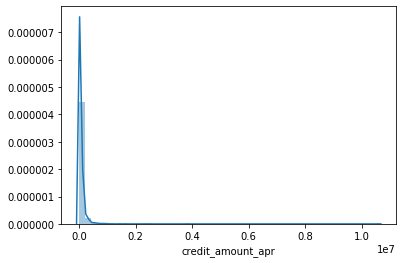

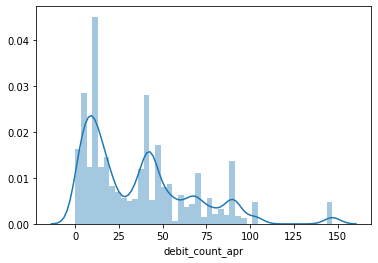

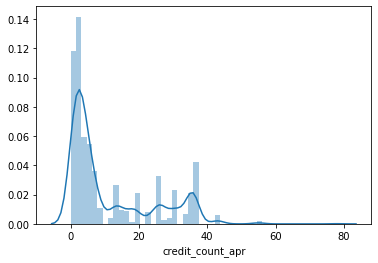

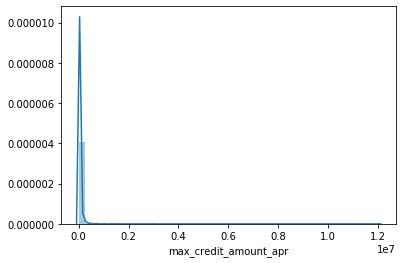

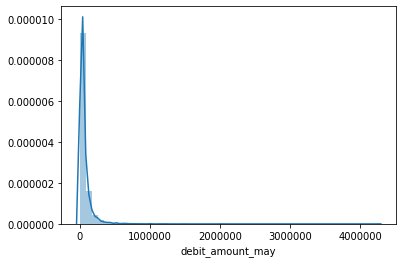

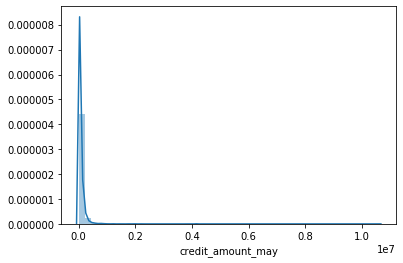

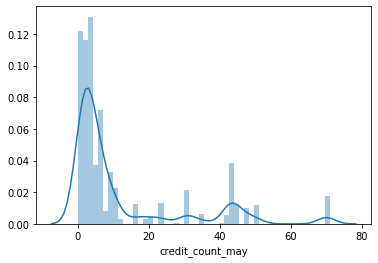

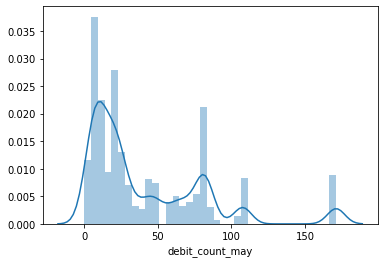

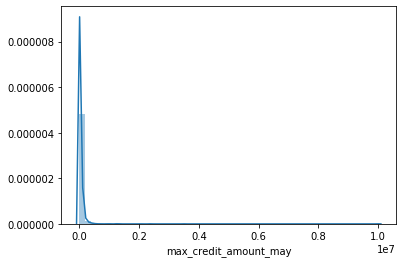

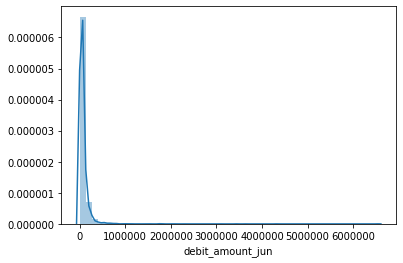

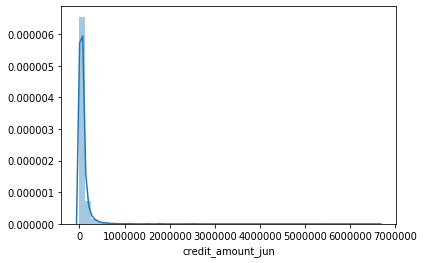

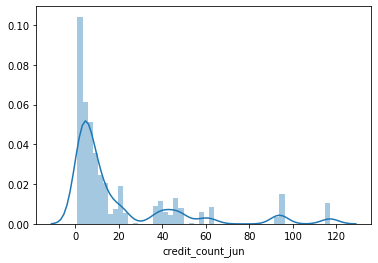

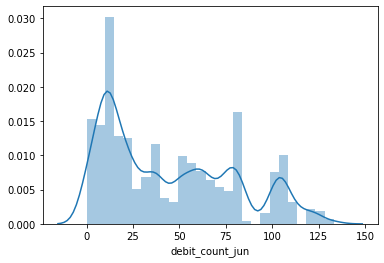

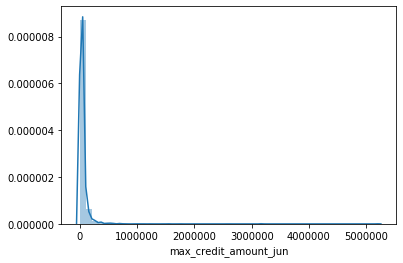

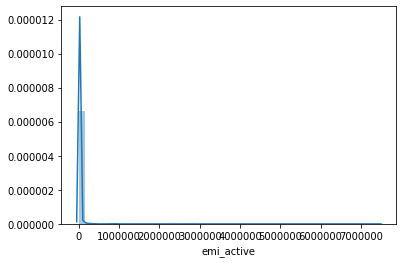

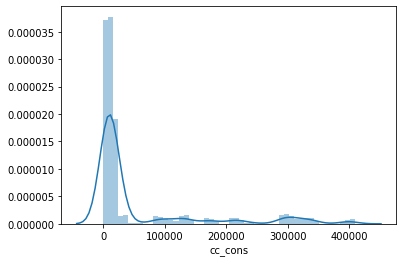

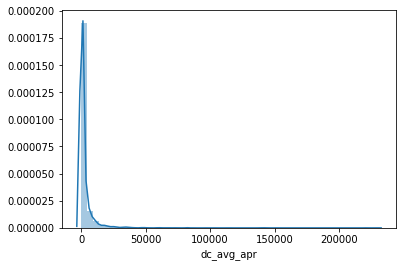

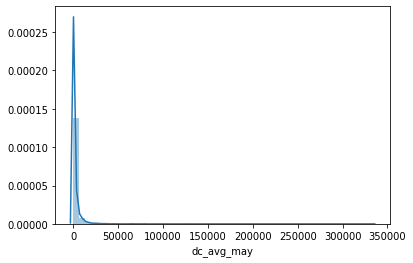

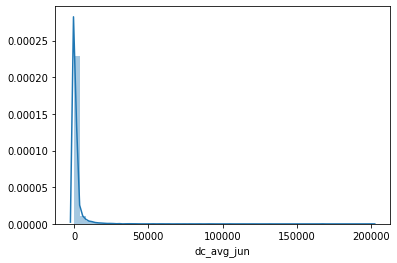

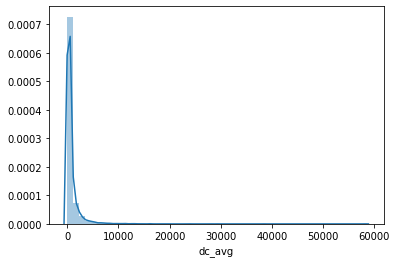

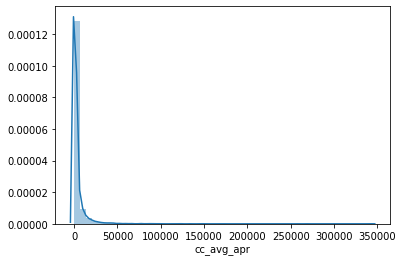

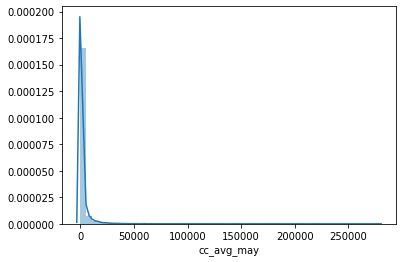

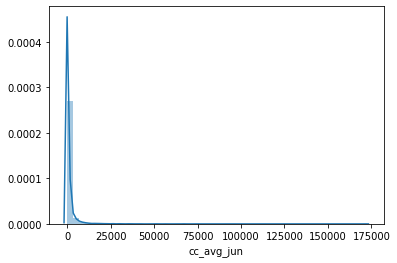

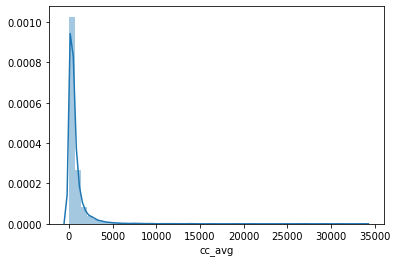

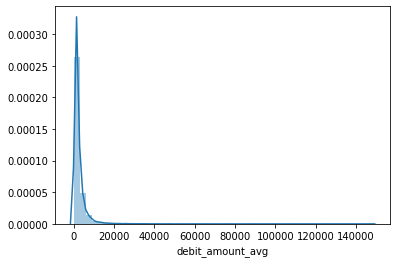

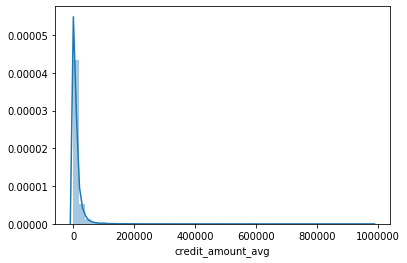

In [181]:
for cols in cat_cols:
    sns.distplot(data_2[cols])
    plt.show()

In [120]:
from sklearn.impute import SimpleImputer

In [182]:
median = data_2['age'].median()

In [183]:
median

40.0

In [184]:
mode = data_2['age'].mode()

In [185]:
mode = mode[0]

In [186]:
data_2['age']=data_2['age'].mask(data_2['age']>70,mode)

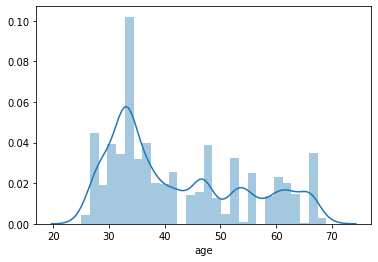

In [187]:
sns.distplot(data_2['age'])

In [188]:
data_2['age'].mean()

42.324666666666666

In [189]:
data_2.head()

,ID,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,dc_avg_apr,dc_avg_may,dc_avg_jun,dc_avg,cc_avg_apr,cc_avg_may,cc_avg_jun,cc_avg,debit_amount_avg,credit_amount_avg
0,12554,current,M,35,708,24893.00,378.00,10288.00,29664.00,16291.40,11432.00,2.0,26.0,10.0,48.0,14.0,47.0,430000.0,593.20,1244.14,787.0,6885.0,85919.48,25192.00,24.0,6.0,25296.0,11527.50,191777.13,2.0,40.0,24563.0,30051.32,12761.0,2.0,65.0,50836.0,1674.09,20014.0,7.87500,2118.857143,243.234043,380.495413,12446.500000,395.692308,1629.140000,1354.536842,988.358915,22973.013000
1,17645,current,M,35,123,18941.62,966.00,20672.00,287.00,4217.00,885.00,1.0,7.0,13.0,3.0,21.0,31.0,127500.0,213557.15,172678.56,90525.0,1500.0,12255.75,88693.37,35.0,36.0,80750.0,92276.57,71162.00,2.0,78.0,23948.0,42119.05,76206.0,21.0,63.0,23226.0,13043.34,10173.0,322.00000,13.666667,28.548387,38.872727,18941.620000,2953.142857,324.384615,2087.172381,833.246420,4001.040169
2,7604,current,M,55,802,5678.87,2724.00,1964.50,3933.11,23956.25,5168.00,43.0,32.0,102.0,4.0,1.0,80.0,199999.0,165907.57,470000.00,25524.0,3735.0,34193.00,84880.00,72.0,9.0,38466.0,19343.00,70978.00,2.0,82.0,10752.0,58373.25,75283.0,7.0,1.0,27036.0,25375.27,16095.0,681.00000,3933.110000,64.600000,139.118941,132.066744,61.390625,234.865196,178.528927,721.995161,12841.166667
3,1590,current,F,29,867,30489.50,1236.00,12609.88,9138.14,17521.00,13650.30,53.0,1.0,50.0,1.0,1.0,10.0,155000.0,81872.65,223379.40,48500.0,-4679.0,11558.23,236326.00,43.0,30.0,52732.0,43867.91,63033.84,23.0,38.0,12607.0,69851.51,68708.0,21.0,83.0,43037.0,3544.33,7707.0,1236.00000,9138.140000,1365.030000,2002.036667,575.273585,12609.880000,350.420000,582.888269,763.888110,4973.889730
4,16556,current,M,34,802,7441.40,6906.04,4364.00,1939.00,2121.00,6829.18,67.0,47.0,82.0,54.0,16.0,68.0,297000.0,568.80,385000.00,183999.0,6916.0,17022.81,58897.03,46.0,36.0,19613.0,153253.71,30286.00,24.0,50.0,25213.0,10071.00,80140.0,8.0,32.0,32044.0,12780.44,96408.0,127.88963,121.187500,100.429118,113.581304,111.065672,92.851064,25.865854,71.053061,1408.965000,2490.044559


In [190]:
data_2 = data_2.drop(['region_code'], axis=1)

In [191]:
data_2.head(0)

,ID,account_type,gender,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,dc_avg_apr,dc_avg_may,dc_avg_jun,dc_avg,cc_avg_apr,cc_avg_may,cc_avg_jun,cc_avg,debit_amount_avg,credit_amount_avg


In [192]:
cols = data_2.select_dtypes(exclude ='object')

In [193]:
for col in cols:
    data_2[col]=np.log1p(data_2[col])

In [194]:
data_2

,ID,account_type,gender,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,dc_avg_apr,dc_avg_may,dc_avg_jun,dc_avg,cc_avg_apr,cc_avg_may,cc_avg_jun,cc_avg,debit_amount_avg,credit_amount_avg
0,9.437874,current,M,3.583519,10.122382,5.937536,9.238831,10.297723,9.698454,9.344259,1.098612,3.295837,2.397895,3.891820,2.708050,3.871201,12.971543,6.387216,7.127003,6.669498,8.837246,11.361177,10.134321,3.218876,1.945910,10.138441,9.352578,12.164094,1.098612,3.713572,10.109037,10.310695,9.454227,1.098612,4.189655,10.836380,7.423622,9.904237,2.183238,7.659104,5.498127,5.944099,9.429275,5.983161,7.396421,7.211953,6.897057,10.042119
1,9.778264,current,M,3.583519,9.849170,6.874198,9.936584,5.662960,8.347116,6.786717,0.693147,2.079442,2.639057,1.386294,3.091042,3.465736,11.755879,12.271664,12.059193,11.413392,7.313887,9.413832,11.392952,3.583519,3.610918,11.299126,11.432556,11.172728,1.098612,4.369448,10.083682,10.648279,11.241209,3.091042,4.158883,10.053071,9.476110,9.227591,5.777652,2.685577,3.386029,3.685693,9.849170,7.990964,5.785008,7.644045,6.726529,8.294560
2,8.936561,current,M,4.025352,8.644684,7.910224,7.583502,8.277440,10.084026,8.550435,3.784190,3.496508,4.634729,1.609438,0.693147,4.394449,12.206073,12.019192,13.060490,10.147414,8.225771,10.439805,11.349006,4.290459,2.302585,10.557556,9.870138,11.170139,1.098612,4.418841,9.282940,10.974630,11.229023,2.079442,0.693147,10.204962,10.141570,9.686326,6.525030,8.277440,4.183576,4.942492,4.890851,4.133415,5.463260,5.190336,6.583403,9.460489
3,7.372118,current,F,3.401197,10.325170,7.120444,9.442315,9.120322,9.771213,9.521590,3.988984,0.693147,3.931826,0.693147,0.693147,2.397895,11.951187,11.312932,12.316631,10.789340,NaN,9.355240,12.372972,3.784190,3.433987,10.872997,10.688961,11.051443,3.178054,3.663562,9.442087,11.154141,11.137635,3.091042,4.430817,10.669839,8.173387,8.950014,7.120444,9.120322,7.219664,7.602420,6.356583,9.442315,5.861982,6.369710,6.639730,8.512158
4,9.714564,current,M,3.555348,8.914949,8.840296,8.381373,7.570443,7.660114,8.829106,4.219508,3.871201,4.418841,4.007333,2.833213,4.234107,12.601491,6.345285,12.861001,12.122691,8.841737,9.742368,10.983563,3.850148,3.610918,9.883999,11.939857,10.318474,3.218876,3.931826,10.135155,9.217515,11.291543,2.197225,3.496508,10.374896,9.455749,11.476355,4.858956,4.805557,4.619360,4.741285,4.719085,4.541709,3.290856,4.277403,7.251320,7.820457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,8.853094,current,F,3.988984,9.253856,7.106483,8.889204,8.262043,8.799963,9.221082,1.386294,3.610918,1.386294,3.806662,4.025352,3.401197,13.161586,12.134523,10.085851,9.693754,6.885510,10.329067,10.346120,4.382027,1.098612,10.225897,10.325573,10.072935,0.693147,2.197225,8.844625,13.097563,10.660231,2.708050,2.197225,11.324811,11.276795,8.357963,3.356937,4.268552,5.856553,4.785331,8.155435,5.310498,7.701652,6.363480,8.661898,8.654081
14996,9.247347,current,M,3.806662,10.305324,8.749732,9.681999,8.937350,7.702592,6.736492,0.693147,3.555348,1.609438,2.079442,0.693147,1.098612,13.064736,10.119929,12.305923,9.420439,NaN,10.594232,10.077357,3.784190,1.098612,10.325908,10.966813,10.820258,1.609438,3.044522,12.219186,9.067279,10.462776,2.484907,2.944439,11.679384,8.468654,9.307467,6.804773,8.937350,6.044531,7.297741,10.305324,6.157695,6.317652,7.118887,7.182096,8.764279
14997,7.687997,current,M,3.637586,8.330859,6.856188,9.871029,6.204558,10.700204,7.497080,4.060443,

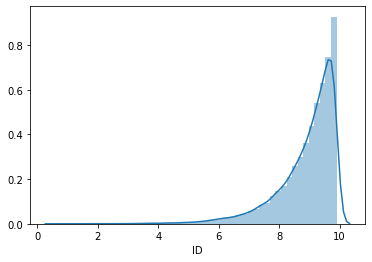

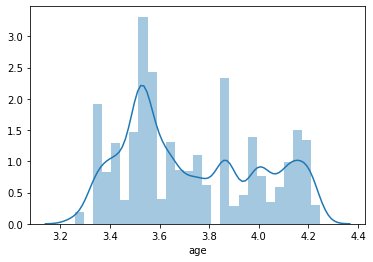

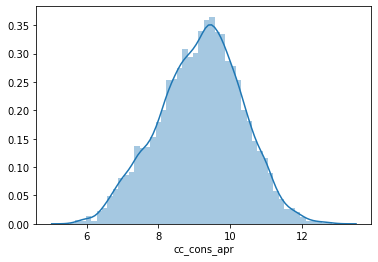

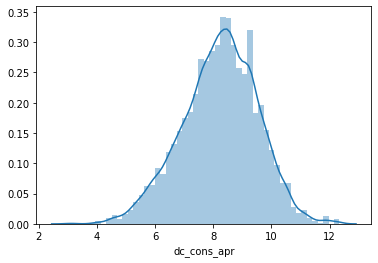

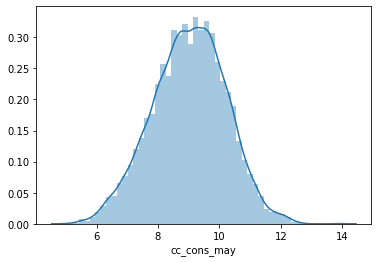

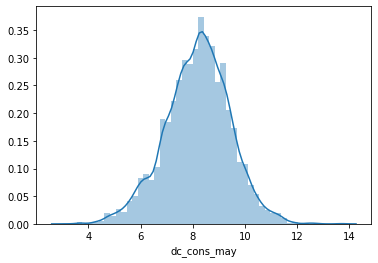

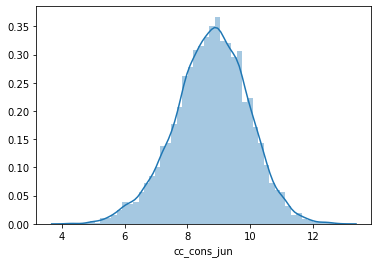

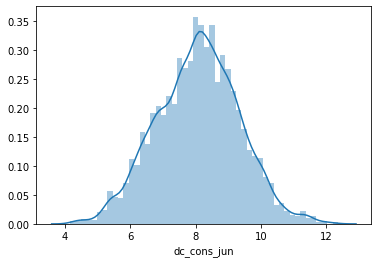

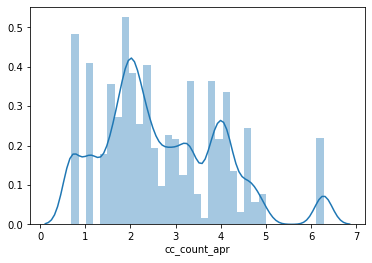

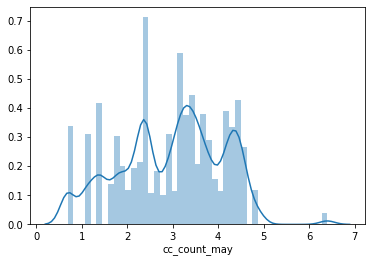

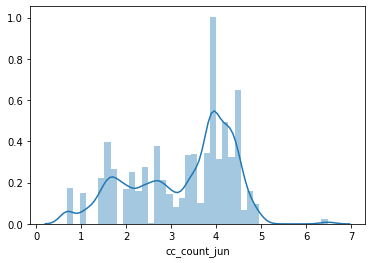

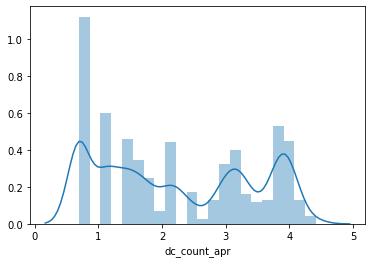

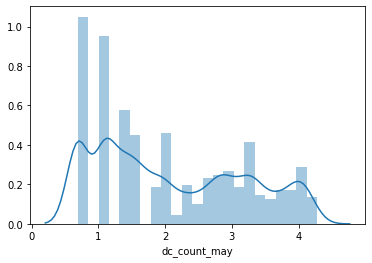

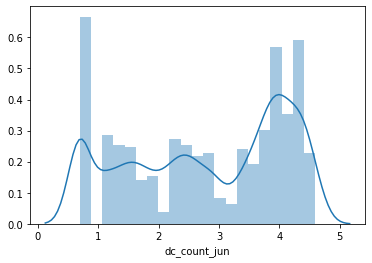

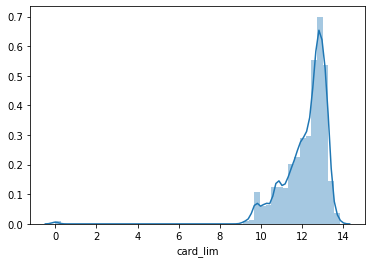

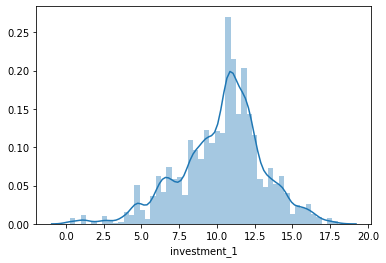

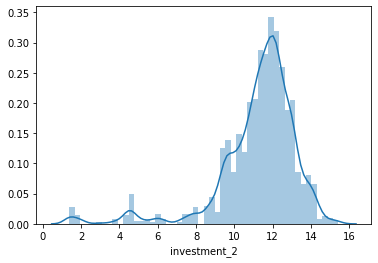

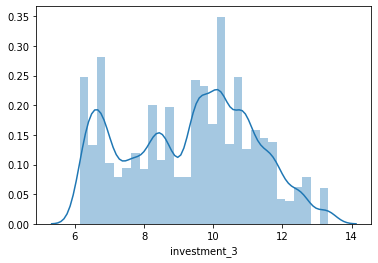

ValueError: cannot convert float NaN to integer

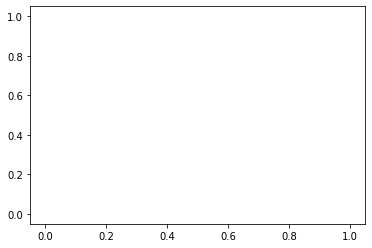

In [196]:
for col in cols:
    sns.distplot(data_2[col])
    plt.show()

In [195]:
data_2.describe()

,ID,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,dc_avg_apr,dc_avg_may,dc_avg_jun,dc_avg,cc_avg_apr,cc_avg_may,cc_avg_jun,cc_avg,debit_amount_avg,credit_amount_avg
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,11775.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,8.912887,3.731529,9.167728,8.225738,9.016755,8.187930,8.758622,8.071594,2.697609,2.965888,3.250959,2.238145,2.092080,2.790178,12.185204,10.333240,11.232499,9.299794,7.631786,10.533285,10.707407,3.200914,1.950907,10.378264,10.524001,10.704049,1.886675,3.251715,10.333771,10.682802,10.615713,2.404601,3.374478,10.227708,8.156302,9.644909,6.241092,6.354897,5.467347,5.864470,6.633897,6.169988,5.605539,6.037696,7.369872,8.709171
std,0.985961,0.269724,1.160526,1.299105,1.200181,1.241760,1.171167,1.267035,1.321531,1.120742,1.114977,1.205309,1.110527,1.294928,1.110273,2.765115,2.103874,1.843548,2.508783,1.260338,1.152269,1.020491,1.084983,1.060015,1.130046,1.247583,1.112412,1.049208,1.197746,1.113024,1.321721,1.079028,1.117974,1.322437,1.646037,1.610965,1.902373,1.796138,1.924558,1.157290,1.864069,1.715462,1.662590,1.067607,0.877390,1.088457
min,0.693147,3.258097,5.537334,3.013081,5.062595,3.135494,4.189655,4.143135,0.693147,0.693147,0.693147,0.693147,0.693147,0.693147,0.000000,0.262364,1.386294,6.137727,0.000000,1.611436,4.133245,0.000000,0.000000,0.693147,3.374169,2.451867,0.000000,0.000000,0.223144,1.829376,2.555676,0.693147,0.000000,0.058269,0.000000,0.000000,0.573003,0.525266,0.490206,1.890979,0.526521,0.755489,0.726283,2.178068,3.801073,2.358320
25%,8.529418,3.526361,8.392090,7.399398,8.199464,7.405192,8.008199,7.215056,1.791759,2.197225,2.397895,1.098612,1.098612,1.609438,11.728045,8.716208,10.549910,7.703008,7.290293,10.053261,10.197909,2.484907,1.098612,9.937116,9.952484,10.142948,1.098612,2.484907,9.907679,10.155552,10.123469,1.609438,2.564949,9.854245,7.345694,8.820109,4.856791,5.077742,4.064407,5.044983,5.362447,4.990969,4.442414,5.357267,6.762760,7.927392
50%,9.215825,3.663562,9.238840,8.293524,9.070622,8.248398,8.803312,8.110127,2.397895,3.178054,3.583519,2.079442,1.791759,2.890372,12.513561,10.715240,11.617294,9.537772,8.583168,10.642482,10.759986,3.496508,1.791759,10.370863,10.551551,10.781889,1.609438,3.178054,10.354691,10.732141,10.734242,2.079442,3.663562,10.323069,8.282845,9.500395,6.230998,6.393949,5.334589,5.758089,6.716409,6.098894,5.500272,6.014999,7.296872,8.663098
75%,9.616888,3.988984,9.971427,9.142064,9.849681,9.013474,9.564372,8.935640,3.806662,3.784190,4.127134,3.258097,3.091042,4.007333,12.899222,11.993529,12.409018,10.798575,8.919854,11.230155,11.361358,3.970292,2.995732,10.869711,11.217232,11.457099,2.484907,4.248495,10.932875,11.345927,11.357363,3.091042,4.304065,10.882039,9.146057,9.908811,7.660765,7.685951,6.833810,6.593657,7.950573,7.335860,6.688404,6.706128,7.916075,9.464607
max,9.903438,4.248495,12.996873,12.342595,13.926378,13.722545,12.855569,12.360445,6.276643,6.400257,6.483107,4.418841,4.276666,4.595120,13.815512,18.004823,15.424949,13.321216,10.472969,15.455839,16.175621,4.997212,4.369

In [199]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
scorer = make_scorer(mean_squared_error, greater_is_better = False)

In [198]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [249]:
X=data_2[['cc_avg', 'card_lim']]

In [250]:
y=data_2['cc_cons']

In [251]:
model1 = LinearRegression()

In [252]:
from sklearn.model_selection import train_test_split

In [253]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 6, test_size = 0.3)

In [254]:
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [255]:
y_pred = model1.predict(X_test)

In [256]:
mse = mean_squared_error(y_test, y_pred)

In [257]:
mse

2.6283482838422474

In [262]:
rmse = mse**0.5

In [260]:
import math

In [261]:
np.sqrt(mse)

1.6212181481349903

In [264]:
#gender encoding
data_2['gender'].value_counts()

M    12945
F     2055
Name: gender, dtype: int64

In [265]:
from sklearn.preprocessing import LabelEncoder

In [266]:
label_encoder = LabelEncoder()

In [267]:
data_3=data_2

In [268]:
data_3.head()

,ID,account_type,gender,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,dc_avg_apr,dc_avg_may,dc_avg_jun,dc_avg,cc_avg_apr,cc_avg_may,cc_avg_jun,cc_avg,debit_amount_avg,credit_amount_avg
0,9.437874,current,M,3.583519,10.122382,5.937536,9.238831,10.297723,9.698454,9.344259,1.098612,3.295837,2.397895,3.891820,2.708050,3.871201,12.971543,6.387216,7.127003,6.669498,8.837246,11.361177,10.134321,3.218876,1.945910,10.138441,9.352578,12.164094,1.098612,3.713572,10.109037,10.310695,9.454227,1.098612,4.189655,10.836380,7.423622,9.904237,2.183238,7.659104,5.498127,5.944099,9.429275,5.983161,7.396421,7.211953,6.897057,10.042119
1,9.778264,current,M,3.583519,9.849170,6.874198,9.936584,5.662960,8.347116,6.786717,0.693147,2.079442,2.639057,1.386294,3.091042,3.465736,11.755879,12.271664,12.059193,11.413392,7.313887,9.413832,11.392952,3.583519,3.610918,11.299126,11.432556,11.172728,1.098612,4.369448,10.083682,10.648279,11.241209,3.091042,4.158883,10.053071,9.476110,9.227591,5.777652,2.685577,3.386029,3.685693,9.849170,7.990964,5.785008,7.644045,6.726529,8.294560
2,8.936561,current,M,4.025352,8.644684,7.910224,7.583502,8.277440,10.084026,8.550435,3.784190,3.496508,4.634729,1.609438,0.693147,4.394449,12.206073,12.019192,13.060490,10.147414,8.225771,10.439805,11.349006,4.290459,2.302585,10.557556,9.870138,11.170139,1.098612,4.418841,9.282940,10.974630,11.229023,2.079442,0.693147,10.204962,10.141570,9.686326,6.525030,8.277440,4.183576,4.942492,4.890851,4.133415,5.463260,5.190336,6.583403,9.460489
3,7.372118,current,F,3.401197,10.325170,7.120444,9.442315,9.120322,9.771213,9.521590,3.988984,0.693147,3.931826,0.693147,0.693147,2.397895,11.951187,11.312932,12.316631,10.789340,NaN,9.355240,12.372972,3.784190,3.433987,10.872997,10.688961,11.051443,3.178054,3.663562,9.442087,11.154141,11.137635,3.091042,4.430817,10.669839,8.173387,8.950014,7.120444,9.120322,7.219664,7.602420,6.356583,9.442315,5.861982,6.369710,6.639730,8.512158
4,9.714564,current,M,3.555348,8.914949,8.840296,8.381373,7.570443,7.660114,8.829106,4.219508,3.871201,4.418841,4.007333,2.833213,4.234107,12.601491,6.345285,12.861001,12.122691,8.841737,9.742368,10.983563,3.850148,3.610918,9.883999,11.939857,10.318474,3.218876,3.931826,10.135155,9.217515,11.291543,2.197225,3.496508,10.374896,9.455749,11.476355,4.858956,4.805557,4.619360,4.741285,4.719085,4.541709,3.290856,4.277403,7.251320,7.820457


In [276]:
data_3['gender']=label_encoder.fit_transform(data_3['gender'])

In [277]:
data_3['gender'].value_counts()

1    12945
0     2055
Name: gender, dtype: int64

In [328]:
X=data_3[['cc_avg', 'card_lim','gender','account_type']]

In [329]:
y=data_3['cc_cons']

In [330]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 6, test_size = 0.3)

In [331]:
model1.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [332]:
y_pred = model1.predict(X_test)

In [333]:
mse = mean_squared_error(y_test, y_pred)

In [334]:
mse

2.628293506948864

In [335]:
rmse_2 = np.sqrt(mse)

In [336]:
rmse_2, rmse

(1.621201254301533, 1.6212181481349903)

In [316]:
from sklearn.preprocessing import LabelBinarizer

In [322]:
encoder = LabelBinarizer()

In [325]:
data_4=data_2

In [326]:
data_3['account_type']=encoder.fit_transform(data_3['account_type'])

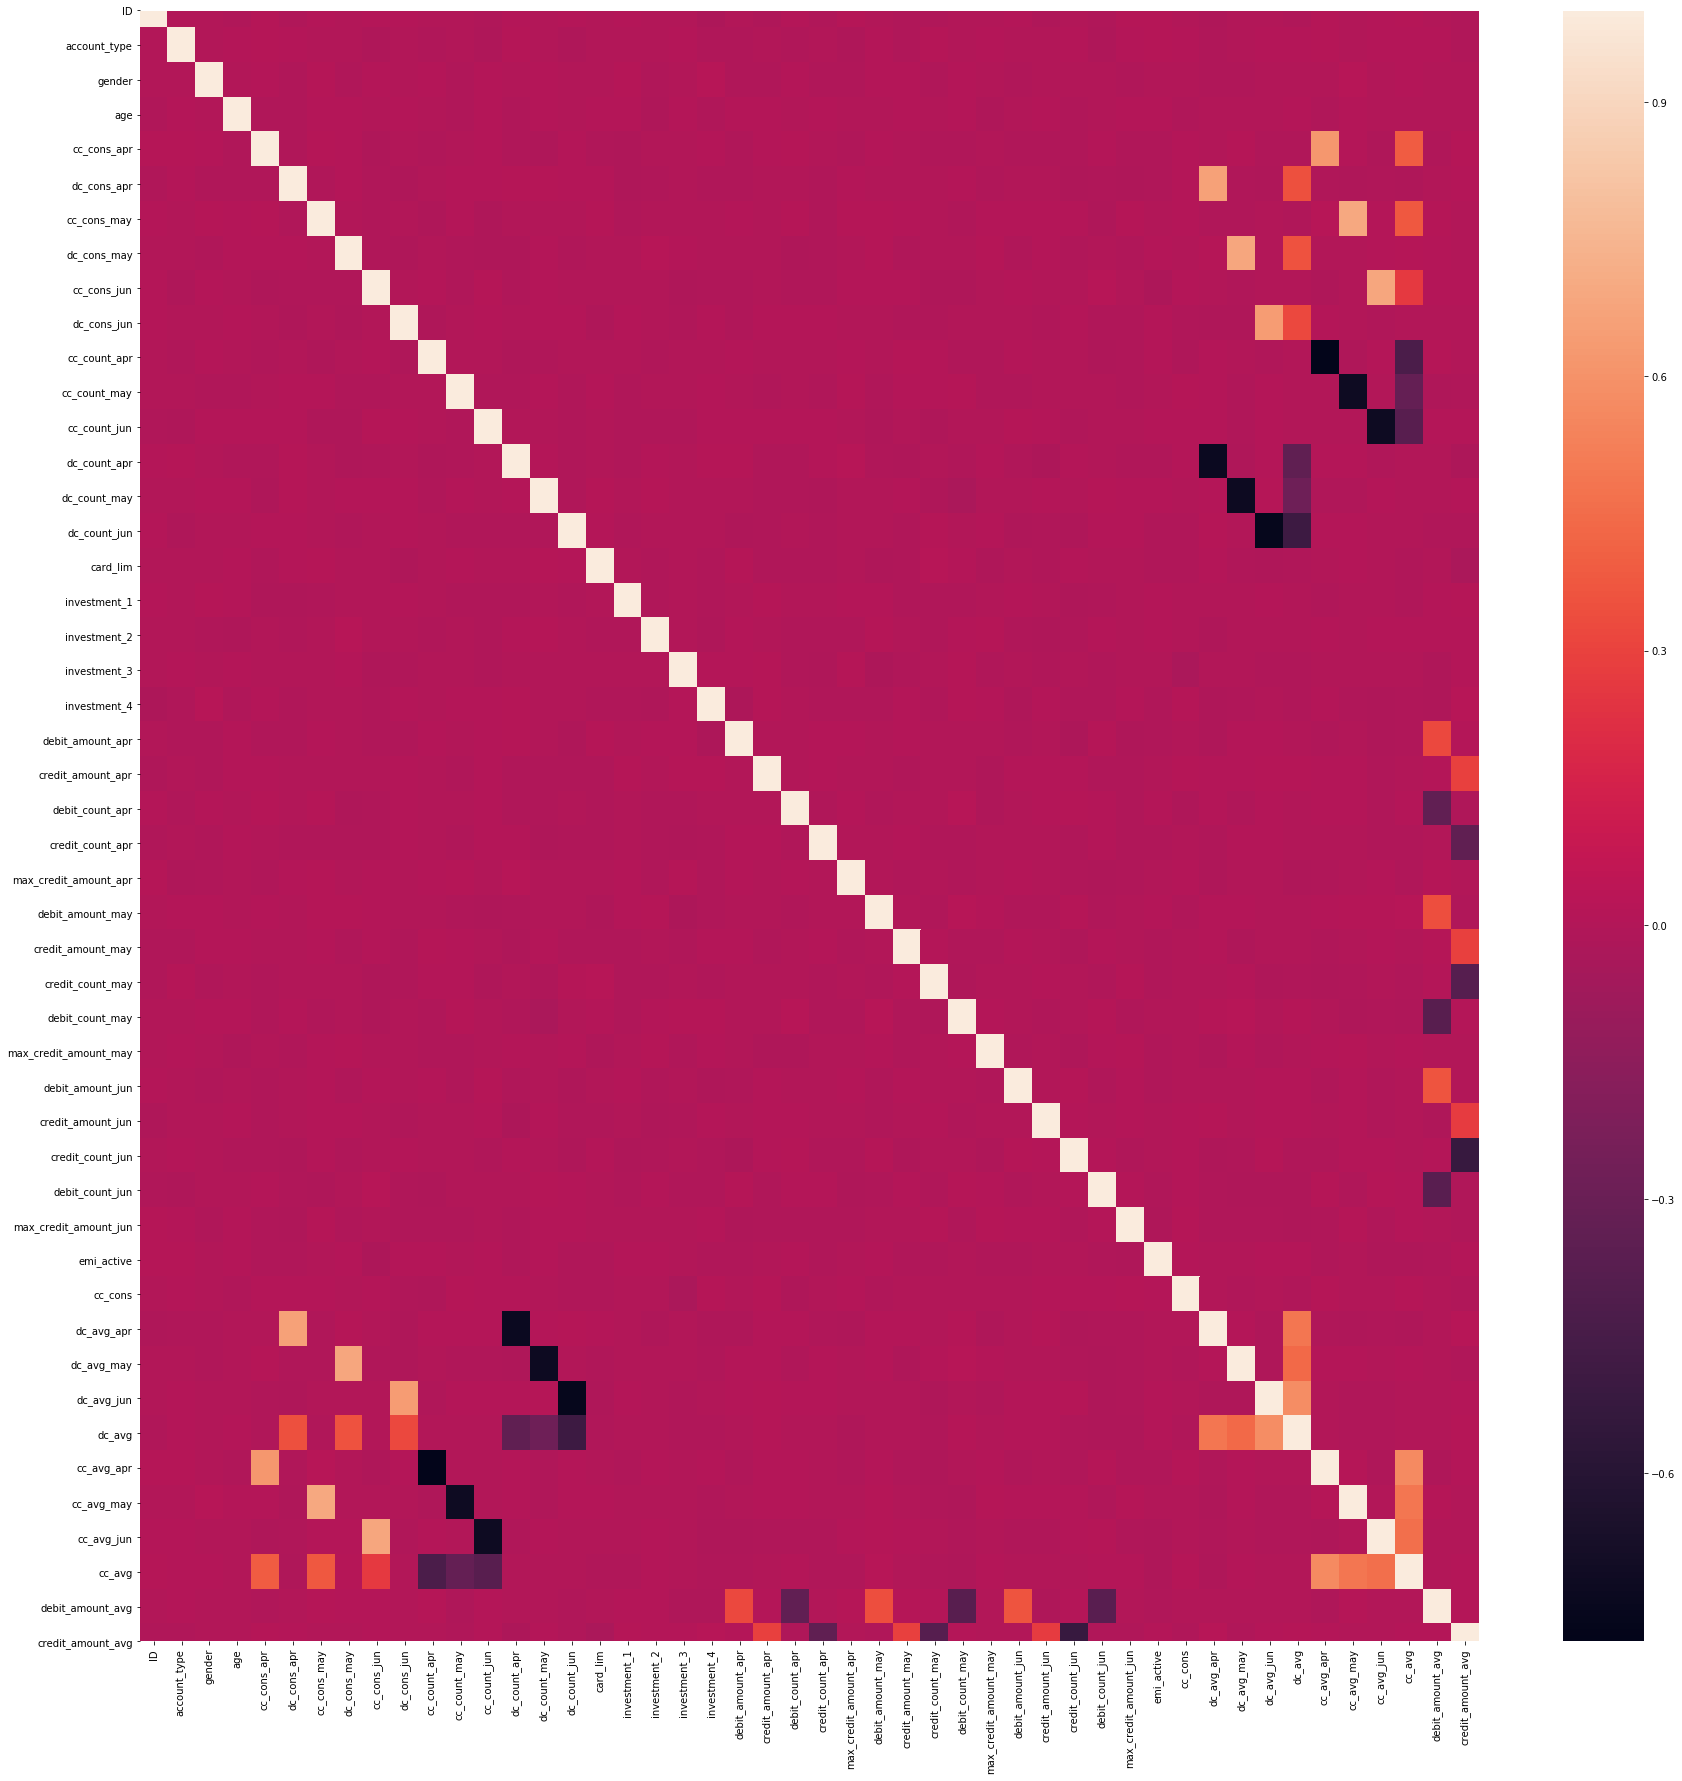

In [383]:
plt.figure(figsize=(30,30))
sns.heatmap(data_3.corr())
plt.show()

In [341]:
cor = data_3.corr()

In [346]:
cor

,ID,account_type,gender,age,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,cc_count_jun,dc_count_apr,dc_count_may,dc_count_jun,card_lim,investment_1,investment_2,investment_3,investment_4,debit_amount_apr,credit_amount_apr,debit_count_apr,credit_count_apr,max_credit_amount_apr,debit_amount_may,credit_amount_may,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,dc_avg_apr,dc_avg_may,dc_avg_jun,dc_avg,cc_avg_apr,cc_avg_may,cc_avg_jun,cc_avg,debit_amount_avg,credit_amount_avg
ID,1.000000,-0.000654,0.001714,-0.003561,0.017463,-0.006727,0.006460,-0.000920,0.004180,0.003801,-0.002640,0.002814,-0.004065,0.007946,0.000279,0.003827,0.001494,0.007617,-0.000769,-0.001409,-0.020991,-0.000578,-0.012539,0.008214,-0.004910,0.012873,0.000938,-0.004987,-0.004318,0.003682,-0.000539,0.008111,-0.011681,-0.001479,-0.005310,0.012862,0.016313,0.003046,-0.010731,-0.000819,-0.000872,-0.008226,0.013153,0.002140,0.005738,0.010721,0.000882,-0.006907
account_type,-0.000654,1.000000,-0.001405,0.005644,0.017161,0.009770,-0.002912,-0.001252,-0.010730,-0.000401,-0.003830,-0.000055,-0.016223,0.013770,0.002070,-0.010826,0.001151,0.002568,-0.001926,0.009520,-0.007565,-0.003399,0.001040,-0.006439,0.001243,-0.015587,0.007700,-0.007247,0.017507,0.001249,0.006895,-0.000676,-0.000221,0.005292,-0.012435,0.005078,0.014122,0.005571,-0.003888,-0.001584,0.007752,0.005257,0.013428,-0.002548,0.004160,0.007829,0.004940,-0.009657
gender,0.001714,-0.001405,1.000000,0.000168,0.004699,-0.004552,0.015878,-0.005503,0.006651,0.001563,0.006426,-0.009308,0.005633,0.003637,0.004531,-0.001993,0.000097,0.014904,-0.003836,0.002600,0.023235,-0.003251,-0.009753,0.004920,-0.004943,-0.009776,0.004349,0.007162,-0.004518,0.005601,0.003428,-0.008103,0.000139,0.000636,-0.003060,-0.006694,-0.000349,0.001765,-0.005499,-0.006632,0.002716,0.000626,-0.001826,0.017894,0.000556,0.005940,-0.000727,0.003637
age,-0.003561,0.005644,0.000168,1.000000,-0.004205,-0.009632,0.006075,0.008230,0.000750,0.004056,0.001314,-0.007504,0.003786,-0.009950,0.005158,0.001281,0.004951,0.007774,-0.014311,0.006260,-0.005650,0.006244,0.007255,-0.002960,0.010594,0.001094,-0.001399,0.008654,-0.000586,0.006389,-0.010401,-0.002183,0.004821,-0.008581,-0.001968,0.006997,0.007034,-0.006567,0.000813,0.002018,0.002038,0.005200,-0.004275,0.009888,-0.002625,0.002206,-0.003146,0.003689
cc_cons_apr,0.017463,0.017161,0.004699,-0.004205,1.000000,-0.006375,0.011075,0.003924,-0.013958,-0.001065,-0.005784,0.001083,0.004834,-0.005472,-0.014833,0.009555,-0.006466,-0.012125,0.002718,-0.000779,0.008443,-0.003951,0.009411,0.012049,-0.002403,-0.005356,0.007841,0.002171,-0.006820,-0.005068,-0.000118,-0.006281,-0.005371,-0.008096,0.010044,-0.009627,-0.003541,0.005001,0.000279,0.013165,-0.007510,-0.003383,0.622060,0.006705,-0.013370,0.387454,-0.006574,0.012208
dc_cons_apr,-0.006727,0.009770,-0.004552,-0.009632,-0.006375,1.000000,-0.007404,0.007175,-0.006484,-0.012988,0.001059,0.007910,0.007405,0.014416,0.017422,0.009176,0.006453,-0.012924,-0.010071,0.001987,-0.004737,-0.009759,0.002786,-0.000487,-0.007282,0.004275,0.002789,0.002837,0.000928,0.007113,-0.008696,-0.001888,-0.000508,-0.012752,-0.008618,-0.014648,-0.005998,0.008720,0.664879,-0.007637,-0.014565,0.350010,-0.003831,-0.010281,-0.010039,-0.012560,-0.002410,0.010509
cc_cons_may,0.006460,-0.002912,0.015878,0.006075,0.011075,-0.007404,1.000000,-0.003088,-0.005088,0.001810,-0.015166,0.008387,-0.010300,0.000634,0.000954,0.002610,0.012730,-0.004872,-0.001244,0.000692,-0.001685,0.005215,0.002314,0.013867,-0.006435,0.012863,0.013025,0.005064,0.000374,-0.007964,0.007907,0.005402,0.007778,0.010522,-0.012234,0.015906,0.000275,0.010330,-0.006196,-0.003667,-0.001069,-0.009028,0.019058,0.688680,0.004602,0.377707,0.014212,-0.002050
dc_cons_may,-0.000920,-0.001252,-0.005503,0.008230,0.003924,0.007175,-0.003088,1.000000,-0.005255,-0.010336,-0.001252,

In [347]:
#Correlation with output variable
cor_target = abs(cor["cc_cons"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.0]
relevant_features

ID                       0.003046
account_type             0.005571
gender                   0.001765
age                      0.006567
cc_cons_apr              0.005001
dc_cons_apr              0.008720
cc_cons_may              0.010330
dc_cons_may              0.001151
cc_cons_jun              0.004807
dc_cons_jun              0.010063
cc_count_apr             0.011201
cc_count_may             0.013995
cc_count_jun             0.006719
dc_count_apr             0.007535
dc_count_may             0.003609
dc_count_jun             0.004293
card_lim                 0.009624
investment_1             0.001111
investment_2             0.003567
investment_3             0.025962
investment_4             0.011869
debit_amount_apr         0.000452
credit_amount_apr        0.013888
debit_count_apr          0.011522
credit_count_apr         0.002048
max_credit_amount_apr    0.004119
debit_amount_may         0.009004
credit_amount_may        0.000367
credit_count_may         0.002356
debit_count_ma

In [350]:
cor1=data.corr()

In [353]:
#Correlation with output variable
cor_target = abs(cor1["cc_cons"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.02]
relevant_features

cc_cons_may    0.021822
cc_cons        1.000000
Name: cc_cons, dtype: float64

In [356]:
data_2.columns

Index(['ID', 'account_type', 'gender', 'age', 'cc_cons_apr', 'dc_cons_apr',
       'cc_cons_may', 'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun',
       'cc_count_apr', 'cc_count_may', 'cc_count_jun', 'dc_count_apr',
       'dc_count_may', 'dc_count_jun', 'card_lim', 'investment_1',
       'investment_2', 'investment_3', 'investment_4', 'debit_amount_apr',
       'credit_amount_apr', 'debit_count_apr', 'credit_count_apr',
       'max_credit_amount_apr', 'debit_amount_may', 'credit_amount_may',
       'credit_count_may', 'debit_count_may', 'max_credit_amount_may',
       'debit_amount_jun', 'credit_amount_jun', 'credit_count_jun',
       'debit_count_jun', 'max_credit_amount_jun', 'emi_active', 'cc_cons',
       'dc_avg_apr', 'dc_avg_may', 'dc_avg_jun', 'dc_avg', 'cc_avg_apr',
       'cc_avg_may', 'cc_avg_jun', 'cc_avg', 'debit_amount_avg',
       'credit_amount_avg'],
      dtype='object')

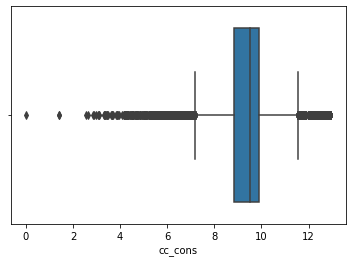

In [371]:
sns.boxplot(data_2['cc_cons'])

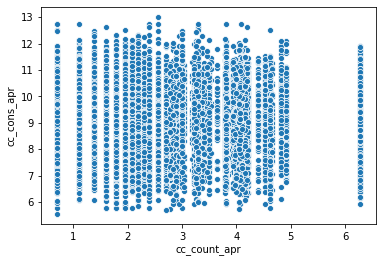

In [375]:
sns.scatterplot(data_2['cc_count_apr'],data_2['cc_cons_apr'])

In [381]:
df['cc_consu_lim']=df['cc_avg']*100/df['card_lim']

In [384]:
df[df['cc_consu_lim']>100].count()

ID                       37
account_type             37
gender                   37
age                      37
region_code              37
cc_cons_apr              37
dc_cons_apr              37
cc_cons_may              37
dc_cons_may              37
cc_cons_jun              37
dc_cons_jun              37
cc_count_apr             37
cc_count_may             37
cc_count_jun             37
dc_count_apr             37
dc_count_may             37
dc_count_jun             37
card_lim                 37
investment_1             37
investment_2             37
investment_3             37
investment_4             37
debit_amount_apr         37
credit_amount_apr        37
debit_count_apr          37
credit_count_apr         37
max_credit_amount_apr    37
debit_amount_may         37
credit_amount_may        37
credit_count_may         37
debit_count_may          37
max_credit_amount_may    37
debit_amount_jun         37
credit_amount_jun        37
credit_count_jun         37
debit_count_jun     